## Setup & Compile Data

### Import necessary libraries

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import pickle
import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from ipywidgets import widgets

In [3]:
# to rescue lost functions
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [4]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [5]:
# ls
# mkdir .secret
# cd .secret/
keys = get_keys("/Users/wendykim/Google Drive/Python/Flatiron/Capstone/.secret/yelp_api.json")

api_key = keys['API_Key']

In [6]:
url = 'https://api.yelp.com/v3/businesses/search'

headers = {'Authorization': 'Bearer {}'.format(api_key)}

### Compile Data

In [10]:
# https://www.nyctourist.com/million-manhattan.htm
neighborhoods = ['Midtown West', 'Greenwich Village', 'East Harlem', 'Upper East Side', 'Midtown East',
                 'Gramercy', 'Little Italy', 'Chinatown', 'SoHo', 'Harlem',
                 'Upper West Side', 'Tribeca', 'Garment District', 'Stuyvesant Town', 'Financial District',
                 'Chelsea', 'Morningside Heights', 'Times Square', 'Murray Hill', 'East Village',
                 'Lower East Village']

In [14]:
nyc = [[] for i in range(len(neighborhoods))] 

In [15]:
# for x in range(len(neighborhoods)):
#     print('---------------------------------------------')
#     print('Gathering Data for {}'.format(neighborhoods[x]))
#     print('---------------------------------------------')


#     for y in range(20):
#         location = neighborhoods[x]+', Manhattan, NY'
#         term = "Restaurants"
#         search_limit = 50
#         offset = 50 * y
#         categories = "(restaurants, All)"
#         sort_by = 'distance'

#         url_params = {
#                         'location': location.replace(' ', '+'),
#                         'term' : term,
#                         'limit': search_limit,
#                         'offset': offset,
#                         'categories': categories,
#                         'sorty_by': sort_by
#                     }

#         response = requests.get(url, headers=headers, params=url_params)
#         print('***** {} Restaurants #{} - #{} ....{}'.format(neighborhoods[x], 
#                                                              offset+1, offset+search_limit,
#                                                              response))
#         nyc[x].append(response)

# # print(response)
# # print(type(response.text))
# # print(response.json().keys())
# # print(response.text[:1000])

---------------------------------------------
Gathering Data for Midtown West
---------------------------------------------
***** Midtown West Restaurants #1 - #50 ....<Response [200]>
***** Midtown West Restaurants #51 - #100 ....<Response [200]>
***** Midtown West Restaurants #101 - #150 ....<Response [200]>
***** Midtown West Restaurants #151 - #200 ....<Response [200]>
***** Midtown West Restaurants #201 - #250 ....<Response [200]>
***** Midtown West Restaurants #251 - #300 ....<Response [200]>
***** Midtown West Restaurants #301 - #350 ....<Response [200]>
***** Midtown West Restaurants #351 - #400 ....<Response [200]>
***** Midtown West Restaurants #401 - #450 ....<Response [200]>
***** Midtown West Restaurants #451 - #500 ....<Response [200]>
***** Midtown West Restaurants #501 - #550 ....<Response [200]>
***** Midtown West Restaurants #551 - #600 ....<Response [200]>
***** Midtown West Restaurants #601 - #650 ....<Response [200]>
***** Midtown West Restaurants #651 - #700 ....<

***** Gramercy Restaurants #801 - #850 ....<Response [200]>
***** Gramercy Restaurants #851 - #900 ....<Response [200]>
***** Gramercy Restaurants #901 - #950 ....<Response [200]>
***** Gramercy Restaurants #951 - #1000 ....<Response [200]>
---------------------------------------------
Gathering Data for Little Italy
---------------------------------------------
***** Little Italy Restaurants #1 - #50 ....<Response [200]>
***** Little Italy Restaurants #51 - #100 ....<Response [200]>
***** Little Italy Restaurants #101 - #150 ....<Response [200]>
***** Little Italy Restaurants #151 - #200 ....<Response [200]>
***** Little Italy Restaurants #201 - #250 ....<Response [200]>
***** Little Italy Restaurants #251 - #300 ....<Response [200]>
***** Little Italy Restaurants #301 - #350 ....<Response [200]>
***** Little Italy Restaurants #351 - #400 ....<Response [200]>
***** Little Italy Restaurants #401 - #450 ....<Response [200]>
***** Little Italy Restaurants #451 - #500 ....<Response [200]>

***** Garment District Restaurants #1 - #50 ....<Response [200]>
***** Garment District Restaurants #51 - #100 ....<Response [200]>
***** Garment District Restaurants #101 - #150 ....<Response [200]>
***** Garment District Restaurants #151 - #200 ....<Response [200]>
***** Garment District Restaurants #201 - #250 ....<Response [200]>
***** Garment District Restaurants #251 - #300 ....<Response [200]>
***** Garment District Restaurants #301 - #350 ....<Response [200]>
***** Garment District Restaurants #351 - #400 ....<Response [200]>
***** Garment District Restaurants #401 - #450 ....<Response [200]>
***** Garment District Restaurants #451 - #500 ....<Response [200]>
***** Garment District Restaurants #501 - #550 ....<Response [200]>
***** Garment District Restaurants #551 - #600 ....<Response [200]>
***** Garment District Restaurants #601 - #650 ....<Response [200]>
***** Garment District Restaurants #651 - #700 ....<Response [200]>
***** Garment District Restaurants #701 - #750 ....<

***** Times Square Restaurants #701 - #750 ....<Response [200]>
***** Times Square Restaurants #751 - #800 ....<Response [200]>
***** Times Square Restaurants #801 - #850 ....<Response [200]>
***** Times Square Restaurants #851 - #900 ....<Response [200]>
***** Times Square Restaurants #901 - #950 ....<Response [200]>
***** Times Square Restaurants #951 - #1000 ....<Response [200]>
---------------------------------------------
Gathering Data for Murray Hill
---------------------------------------------
***** Murray Hill Restaurants #1 - #50 ....<Response [200]>
***** Murray Hill Restaurants #51 - #100 ....<Response [200]>
***** Murray Hill Restaurants #101 - #150 ....<Response [200]>
***** Murray Hill Restaurants #151 - #200 ....<Response [200]>
***** Murray Hill Restaurants #201 - #250 ....<Response [200]>
***** Murray Hill Restaurants #251 - #300 ....<Response [200]>
***** Murray Hill Restaurants #301 - #350 ....<Response [200]>
***** Murray Hill Restaurants #351 - #400 ....<Response

**Double check responses with empty business list**

In [12]:
for x in range(len(neighborhoods)):
    for y in range(20):
        num = len(nyc[x][y].json()['businesses'])
        if num != 50:
            print(neighborhoods[x], y, num)

Little Italy 10 36
Little Italy 11 0
Little Italy 12 0
Little Italy 13 0
Little Italy 14 0
Little Italy 15 0
Little Italy 16 0
Little Italy 17 0
Little Italy 18 0
Little Italy 19 0


In [13]:
# Save the compiled data into dataframe
df = pd.DataFrame()
for x in range(len(neighborhoods)):
    if x == 6: # Little Italy has total 536
        for y in range(11):
            df_temp = pd.DataFrame.from_dict(nyc[x][y].json()['businesses'])
            df_temp.loc[:,'neighborhood'] = neighborhoods[x]
            df = df.append(df_temp)

    else:
        for y in range(20):
            df_temp = pd.DataFrame.from_dict(nyc[x][y].json()['businesses'])
            df_temp.loc[:,'neighborhood'] = neighborhoods[x]
            df = df.append(df_temp)

print(len(df))
df.head() 

20536


id                     alias             name  \
0  Rc1lxc5lSKJYd162JHNMfQ              bea-new-york              Bea   
1  BQRfaq0U75B5EEblBZ2Aqg     the-ribbon-new-york-5       The Ribbon   
2  eTR6nfHvQzvKX7Dcd6JrfA  district-social-new-york  District Social   
3  xZ96vaoL-cQjfotmUKtjJQ      barn-joo-35-new-york      Barn Joo 35   
4  Wx6lMnEh7dCmX-9PQF1Ifw      toloache-50-new-york      Toloache 50   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/bh2s5G...      False   
1  https://s3-media4.fl.yelpcdn.com/bphoto/PAm9Ef...      False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/BG3aWX...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/1R5CgY...      False   
4  https://s3-media4.fl.yelpcdn.com/bphoto/m5yGUn...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/bea-new-york?adjust_c...          2496   
1  https://www.yelp.com/biz/the-ribbon-new-york-5...           213   
2  https://www.yelp.com/biz/district-social-new-y...           700   
3  https://www.yelp.com/biz/barn-joo-35-new-york?...          1992   
4  https://www.yelp.com/biz/toloache-50-new-york?...          1967   

                                          categories  rating  \
0  [{'alias': 'newamerican', 'title': 'American (...     4.0   
1  [{'alias': 'newamerican', 'title': 'American (...     4.0   
2  [{'alias': 'bars', 'title': 'Bars'}, {'alias':...     4.0   
3  [{'alias': 'korean', 'title': 'Korean'}, {'ali...     4.5   
4         [{'alias': 'mexican', 'title': 'Mexican'}]     4.0   

                                         coordinates  \
0  {'latitude': 40.7591968, 'longitude': -73.9923...   
1      {'latitude': 40.7576, 'longitude': -73.98693}   
2  {'latitude': 40.7535743713379, 'longitude': -7...   
3     {'latitude': 40.74964, 'longitude': -73.98582}   
4  {'latitude': 40.762325, 'longitude': -73.9855741}   

                                 transactions price  \
0                    [restaurant_reservation]    $$   
1  [restaurant_reservation, delivery, pickup]   NaN   
2                    [restaurant_reservation]    $$   
3  [restaurant_reservation, delivery, pickup]    $$   
4  [restaurant_reservation, delivery, pickup]    $$   

                                            location         phone  \
0  {'address1': '403 W 43rd St', 'address2': '', ...  +12126021910   
1  {'address1': '220 West 44th St', 'address2': N...  +12129442474   
2  {'address1': '252 W 37th St', 'address2': None...  +12129949599   
3  {'address1': '34 W 35th St', 'address2': '', '...  +12125644430   
4  {'address1': '251 West 50th St', 'address2': '...  +12125811818   

    display_phone     distance  neighborhood  
0  (212) 602-1910   139.794840  Midtown West  
1  (212) 944-2474   355.920608  Midtown West  
2  (212) 994-9599   646.839197  Midtown West  
3  (212) 564-4430  1152.199725  Midtown West  
4  (212) 581-1818   543.267654  Midtown West

In [14]:
# save nyc dataset
# pickle.dump(nyc, open("nyc.p", "wb"))
# pickle.dump(df, open("nyc_df.p", "wb"))

In [129]:
# load data from pickle file
# nyc = pickle.load(open("nyc.p", "rb"))
df = pickle.load(open("nyc_df.p", "rb"))

### Deduplicate restaurant list

In [130]:
# Identify duplicates
df['count'] = df.groupby('id')['id'].transform('count')
df.head(3)

id                     alias             name  \
0  Rc1lxc5lSKJYd162JHNMfQ              bea-new-york              Bea   
1  BQRfaq0U75B5EEblBZ2Aqg     the-ribbon-new-york-5       The Ribbon   
2  eTR6nfHvQzvKX7Dcd6JrfA  district-social-new-york  District Social   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/bh2s5G...      False   
1  https://s3-media4.fl.yelpcdn.com/bphoto/PAm9Ef...      False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/BG3aWX...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/bea-new-york?adjust_c...          2496   
1  https://www.yelp.com/biz/the-ribbon-new-york-5...           213   
2  https://www.yelp.com/biz/district-social-new-y...           700   

                                          categories  rating  \
0  [{'alias': 'newamerican', 'title': 'American (...     4.0   
1  [{'alias': 'newamerican', 'title': 'American (...     4.0   
2  [{'alias': 'bars', 'title': 'Bars'}, {'alias':...     4.0   

                                         coordinates  \
0  {'latitude': 40.7591968, 'longitude': -73.9923...   
1      {'latitude': 40.7576, 'longitude': -73.98693}   
2  {'latitude': 40.7535743713379, 'longitude': -7...   

                                 transactions price  \
0                    [restaurant_reservation]    $$   
1  [restaurant_reservation, delivery, pickup]   NaN   
2                    [restaurant_reservation]    $$   

                                            location         phone  \
0  {'address1': '403 W 43rd St', 'address2': '', ...  +12126021910   
1  {'address1': '220 West 44th St', 'address2': N...  +12129442474   
2  {'address1': '252 W 37th St', 'address2': None...  +12129949599   

    display_phone    distance  neighborhood  count  
0  (212) 602-1910  139.794840  Midtown West      9  
1  (212) 944-2474  355.920608  Midtown West      9  
2  (212) 994-9599  646.839197  Midtown West      9

In [131]:
df_sorted = df.sort_values(by=['alias', 'id', 'distance'])
# df_sorted.head(10)

In [132]:
df_dedup = df_sorted.drop_duplicates(subset=['alias', 'id'], keep='first', inplace=False).copy()
df_dedup['count'] = df_dedup.groupby('id')['id'].transform('count')
print('Number of Restaurants in Manhattan: ', len(df_dedup))
print('Number of duplicates: ', len(df_dedup[df_dedup['count'] > 1]))
df_dedup.reset_index(inplace=True)
df_dedup.head(3)

Number of Restaurants in Manhattan:  6462
Number of duplicates:  0


index                      id                     alias              name  \
0     32  ZJRC1aIv4CIG6qMKZCR2bQ  1-columbia-deli-new-york  #1 Columbia Deli   
1     41  oinbMkOklSpTiMoS24jppQ    1-noodle-cart-new-york    $1 Noodle Cart   
2     46  ghXmKZpOwbfCl3i1UOg9qg  10-corso-como-new-york-3     10 Corso Como   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/KGvots...      False   
1  https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...      False   
2  https://s3-media3.fl.yelpcdn.com/bphoto/MsjbV6...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/1-columbia-deli-new-y...             1   
1  https://www.yelp.com/biz/1-noodle-cart-new-yor...             3   
2  https://www.yelp.com/biz/10-corso-como-new-yor...            72   

                                          categories  rating  \
0             [{'alias': 'delis', 'title': 'Delis'}]     1.0   
1  [{'alias': 'foodstands', 'title': 'Food Stands...     3.0   
2  [{'alias': 'italian', 'title': 'Italian'}, {'a...     4.0   

                                        coordinates        transactions price  \
0    {'latitude': 40.8118, 'longitude': -73.957643}  [pickup, delivery]   NaN   
1  {'latitude': 40.717617, 'longitude': -74.000575}                  []   NaN   
2   {'latitude': 40.707053, 'longitude': -74.00278}                  []   NaN   

                                            location         phone  \
0  {'address1': '1290 Amsterdam Ave', 'address2':...  +12129321290   
1  {'address1': '147 Ctr St', 'address2': None, '...                 
2  {'address1': '200 Front St', 'address2': '', '...  +12122659500   

    display_phone    distance         neighborhood  count  
0  (212) 932-1290  583.849193  Morningside Heights      1  
1                  334.335889         Little Italy      1  
2  (212) 265-9500  412.422949   Financial District      1

### Import buiness hour details in the deduped list

In [19]:
res_hours = pd.DataFrame(df_dedup['id'])
res_hours.head()

id
0  ZJRC1aIv4CIG6qMKZCR2bQ
1  oinbMkOklSpTiMoS24jppQ
2  ghXmKZpOwbfCl3i1UOg9qg
3  cRyZA1k3nvqj_0s_kr7HGA
4  bgnM6uy66zupYzb4QdL3vA

In [20]:
headers = {'Authorization': 'Bearer {}'.format(api_key)}
res_details = []

for i in range(len(df_dedup['id'])):
    if i % 1000 == 0:
        print('Restaurant #{}...'.format(i))
    res_url = 'https://api.yelp.com/v3/businesses/{}'.format(df_dedup['id'][i])
    response = requests.get(res_url, headers=headers)
    res_details.append(response)

print(len(res_details))

Restaurant #0...
Restaurant #1000...
Restaurant #2000...
Restaurant #3000...
Restaurant #4000...
Restaurant #5000...
Restaurant #6000...
6462


In [47]:
for i in range(len(df_dedup['id'])):
    if res_details[i].status_code != 200:
        print(i, res_details[i])
        print(res_details[i].json())
        print()
        if res_details[i].status_code == 429:
            break

1702 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

3641 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

4580 <Response [429]>
{'error': {'code': 'ACCESS_LIMIT_REACHED', 'description': "You've reached the access limit for this client. See instructions for requesting a higher access limit at https://www.yelp.com/developers/documentation/v3/rate_limiting"}}



In [48]:
# save res_details dataset
# pickle.dump(res_details, open("res_details_pt1.p", "wb"))

# load data from pickle file
# res_details = pickle.load(open("res_details_pt1.p", "rb"))

In [52]:
# redownloading the data after daily limit has been reset
for i in df_dedup['id'][4580:].index:
    if (i == 4580)| (i % 1000 == 0):
        print('Restaurant #{}...'.format(i))
    res_url = 'https://api.yelp.com/v3/businesses/{}'.format(df_dedup['id'][i])
    response = requests.get(res_url, headers=headers)
    res_details[i] = response

print(len(res_details))

Restaurant #4580...
Restaurant #5000...
Restaurant #6000...
6462


In [53]:
for i in range(len(df_dedup['id'])):
    if res_details[i].status_code != 200:
        print(i, res_details[i])
        print(res_details[i].json())
        print()
        if res_details[i].status_code == 429:
            break

1702 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

3641 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

4967 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

6260 <Response [429]>
{'error': {'code': 'TOO_MANY_REQUESTS_PER_SECOND', 'description': 'You have exceeded the queries-per-second limit for this endpoint. Try reducing the rate at which you make queries.'}}



In [54]:
# redownloading the data after daily limit has been reset
for i in df_dedup['id'][6260:].index:
    if (i == 6260)| (i % 1000 == 0):
        print('Restaurant #{}...'.format(i))
    res_url = 'https://api.yelp.com/v3/businesses/{}'.format(df_dedup['id'][i])
    response = requests.get(res_url, headers=headers)
    res_details[i] = response

print(len(res_details))

Restaurant #6260...
6462


In [55]:
for i in range(len(df_dedup['id'])):
    if res_details[i].status_code != 200:
        print(i, res_details[i])
        print(res_details[i].json())
        print()
        if res_details[i].status_code == 429:
            break

1702 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

3641 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

4967 <Response [500]>
{'error': {'code': 'INTERNAL_ERROR', 'description': 'Something went wrong internally, please try again later.'}}

6325 <Response [403]>
{'error': {'code': 'BUSINESS_UNAVAILABLE', 'description': 'We may not be able to provide details for certain businesses, for example if they do not have any reviews yet.'}}



In [58]:
# redownloading the data after daily limit has been reset
for i in [1702, 3641, 4967, 6325]:
    print('Restaurant #{}...'.format(i))
    res_url = 'https://api.yelp.com/v3/businesses/{}'.format(df_dedup['id'][i])
    response = requests.get(res_url, headers=headers)
    res_details[i] = response

print(len(res_details))

Restaurant #1702...
Restaurant #3641...
Restaurant #4967...
Restaurant #6325...
6462


In [59]:
for i in range(len(df_dedup['id'])):
    if res_details[i].status_code != 200:
        print(i, res_details[i])
        print(res_details[i].json())
        print()
        if res_details[i].status_code == 429:
            break

6325 <Response [403]>
{'error': {'code': 'BUSINESS_UNAVAILABLE', 'description': 'We may not be able to provide details for certain businesses, for example if they do not have any reviews yet.'}}



In [12]:
# save res_details dataset
# pickle.dump(res_details, open("res_details_pt2.p", "wb"))

# load data from pickle file
res_details = pickle.load(open("res_details_pt2.p", "rb"))

In [10]:
len(res_details)

6598

In [71]:
# extract business hours
res_hours = pd.DataFrame()

for i in range(len(res_details)):
    
    res_temp = []
    breaks = 0
    
    # businesses endpoint not available due to no exisiting reviews
    # manually input business hours
    if i == 6325:
        res_temp = [df_dedup['id'][i], df_dedup['alias'][i], breaks,
                 'Closed', 'Closed', 0,
                 '1730', '0000', 6.5,
                 '1730', '0000', 6.5,
                 '1730', '0000', 6.5,
                 '1730', '0200', 8.5,
                 '1730', '0200', 8.5,
                 '1730', '0000', 6.5]

    elif i == 4275:
        res_temp = [df_dedup['id'][i], df_dedup['alias'][i], breaks,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0,
                 'n.a.', 'n.a.', 0]
    else:
        res_temp.append(res_details[i].json()['id'])
        res_temp.append(res_details[i].json()['alias'])

        try:
            hours = res_details[i].json()['hours'][0]['open']

            start_times = {0: [], 1: [], 2:[], 3:[], 4:[], 5:[], 6:[]}
            end_times = {0: [], 1: [], 2:[], 3:[], 4:[], 5:[], 6:[]}
            open_hours = {0: [], 1: [], 2:[], 3:[], 4:[], 5:[], 6:[]}

            min_start_times = {}
            max_end_times = {}
            total_open_hours = {}

            for x in range(len(hours)):
                datetimeFormat = '%H%M'
                start = hours[x]['start']
                end = hours[x]['end']
                day = hours[x]['day']

                diff = datetime.datetime.strptime(end, datetimeFormat)\
                       - datetime.datetime.strptime(start, datetimeFormat)

                # adjust data for 24-hour restaurants
                if end == '0000':
                    if start == '0000':
                        end = '2400'
                        open_hour = 24.
                    else:
                        end = '2400'
                        open_hour = diff.seconds/3600
                else:
                    open_hour = diff.seconds/3600
                    
                start_times[day].append(start)
                end_times[day].append(end)
                open_hours[day].append(open_hour)

            for y in range(7):
                try:
                    # when there are multiple hours per day:
                        # add 1 to 'breaks' counter
                        # pull earliest opening time
                        # pull latest closing time

                    if len(start_times[y]) > 1:
                        breaks += 1

                    min_start_times[y] = min(start_times[y])
                    max_end_times[y] = max(end_times[y])
                    total_open_hours[y] = sum(open_hours[y])

                # account for days without hours information (closed)
                except ValueError:
                    min_start_times[y] = 'Closed'
                    max_end_times[y] = 'Closed'
                    total_open_hours[y] = sum(open_hours[y])

            # append opening hours
            res_temp.append(breaks)
            for z in range(7):
                res_temp.append(min_start_times[z])
                res_temp.append(max_end_times[z])
                res_temp.append(total_open_hours[z])

        # account for restaruants without hours information
        except KeyError:
            res_temp.append(breaks)
            for i in range(7):
                res_temp.append('n.a.')
                res_temp.append('n.a.')
                res_temp.append(0)
            
    days_col =['id', 'alias', 'breaks',
               'Mon_start', 'Mon_end', 'Mon_hours',
               'Tue_start', 'Tue_end', 'Tue_hours',
               'Wed_start', 'Wed_end', 'Wed_hours', 
               'Thu_start', 'Thu_end', 'Thu_hours',
               'Fri_start', 'Fri_end', 'Fri_hours',
               'Sat_start', 'Sat_end', 'Sat_hours',
               'Sun_start', 'Sun_end', 'Sun_hours']

    res_temp_df = pd.DataFrame(res_temp).T
    res_temp_df.columns = days_col
    res_hours = pd.concat([res_hours, res_temp_df], axis=0, ignore_index=True, sort=False)

res_hours.tail()
# res_temp_df

id                                   alias breaks  \
6457  I6KHYESZdZQz0fnMaMyIpQ                        zusik-new-york-2      2   
6458  abNHO9-xlCsv31gghCUuxw  zutto-japanese-american-pub-new-york-2      0   
6459  0AoaUlXkQOlalpA3v-Ivqw                       zyara-ny-new-york      0   
6460  xymU2HPO_euz1Ss1AE9Fyw                   zzs-clam-bar-new-york      0   
6461  9YXvNE2jpEhA4k6M8WDH7A        ñaño-ecuadorian-kitchen-new-york      0   

     Mon_start Mon_end Mon_hours Tue_start Tue_end Tue_hours Wed_start  ...  \
6457      1700    2400         7      1700    2400         7      1700  ...   
6458      1100    2200        11      1100    2200        11      1100  ...   
6459      1200    2400        12      1200    2400        12      1200  ...   
6460    Closed  Closed         0      1800    0100         7      1800  ...   
6461      1700    2030       3.5      1500    2030       5.5      1500  ...   

     Thu_hours Fri_start Fri_end Fri_hours Sat_start Sat_end Sat_hours  \
6457         8      1700    0100         8      1100    1600        13   
6458        11      1100    2300        12      1200    2300        11   
6459        12      1200    2400        12      1200    2400        12   
6460         7      1800    0100         7      1800    0100         7   
6461       5.5      1200    2200        10      1200    2200        10   

     Sun_start Sun_end Sun_hours  
6457      1100    2400        12  
6458      1200    2200        10  
6459      1200    2400        12  
6460    Closed  Closed         0  
6461      1200    1900         7  

[5 rows x 24 columns]

In [73]:
# Sanity check on data cleaning step for businesses opening & closing at midnight.
# 3 observations (Halal Guys) where both start & end hours were midnight, 
# but operating hours were less than 24.
# This is because these businesses have break times in between
# res_hours.loc[(res_hours['Mon_hours'] != 24) & (res_hours['Mon_start'] == '0000')]
res_hours.loc[(res_hours['Mon_hours'] != 24) & (res_hours['Mon_start'] == '0000') & 
              (res_hours['Mon_end'] == '2400')]
# res_details[5689].json()

id                      alias breaks Mon_start  \
5689  xEnNFXtMLDF5kZDxfaCJgA  the-halal-guys-new-york-2      7      0000   
5690  WEDQ3ysOS2twleC7TZlmGw  the-halal-guys-new-york-7      7      0000   
5691  GcBZDgOKOP-RkH_mI-DS9A  the-halal-guys-new-york-8      7      0000   

     Mon_end Mon_hours Tue_start Tue_end Tue_hours Wed_start  ... Thu_hours  \
5689    2400        18      0000    2400        18      0000  ...        18   
5690    2400        16      0000    2400        16      0000  ...        16   
5691    2400        18      0000    2400        18      0000  ...        18   

     Fri_start Fri_end Fri_hours Sat_start Sat_end Sat_hours Sun_start  \
5689      0000    2400        18      0000    2400      19.5      0000   
5690      0000    2400        16      0000    2400        18      0000   
5691      0000    2400        18      0000    2400        19      0000   

     Sun_end Sun_hours  
5689    2400      19.5  
5690    2400        18  
5691    2400        19  

[3 rows x 24 columns]

In [78]:
len(res_hours)

6462

In [85]:
res_hours['Weekend_hours'] = res_hours['Fri_hours']+res_hours['Sat_hours']+res_hours['Sun_hours']
res_hours['Weekday_hours'] = res_hours['Mon_hours']+res_hours['Tue_hours']+res_hours['Wed_hours']+res_hours['Thu_hours'] 

res_hours['Weekend_hours_avg'] = res_hours['Weekend_hours'] / 3
res_hours['Weekday_hours_avg'] = res_hours['Weekday_hours'] / 4
res_hours.head()

id                              alias breaks Mon_start  \
0  ZJRC1aIv4CIG6qMKZCR2bQ           1-columbia-deli-new-york      0      n.a.   
1  oinbMkOklSpTiMoS24jppQ             1-noodle-cart-new-york      0      n.a.   
2  ghXmKZpOwbfCl3i1UOg9qg           10-corso-como-new-york-3      0      1200   
3  cRyZA1k3nvqj_0s_kr7HGA     107-west-restaurant-new-york-2      0      1130   
4  bgnM6uy66zupYzb4QdL3vA  108-food-dried-hot-pot-new-york-2      0      1100   

  Mon_end Mon_hours Tue_start Tue_end Tue_hours Wed_start  ... Sat_start  \
0    n.a.         0      n.a.    n.a.         0      n.a.  ...      n.a.   
1    n.a.         0      n.a.    n.a.         0      n.a.  ...      n.a.   
2    2000         8      1200    2000         8      1200  ...      1200   
3    2300      11.5      1130    2300      11.5      1130  ...      1100   
4    2200        11      1100    2200        11      1100  ...      1100   

  Sat_end Sat_hours Sun_start Sun_end Sun_hours Weekend_hours Weekday_hours  \
0    n.a.         0      n.a.    n.a.         0             0             0   
1    n.a.         0      n.a.    n.a.         0             0             0   
2    2000         8      1200    2000         8            24            32   
3    2300        12      1100    2300        12          35.5            46   
4    2200        11      1100    2200        11            33            44   

  Weekend_hours_avg Weekday_hours_avg  
0                 0                 0  
1                 0                 0  
2                 8                 8  
3           11.8333              11.5  
4                11                11  

[5 rows x 28 columns]

In [86]:
res_hours.tail()

id                                   alias breaks  \
6457  I6KHYESZdZQz0fnMaMyIpQ                        zusik-new-york-2      2   
6458  abNHO9-xlCsv31gghCUuxw  zutto-japanese-american-pub-new-york-2      0   
6459  0AoaUlXkQOlalpA3v-Ivqw                       zyara-ny-new-york      0   
6460  xymU2HPO_euz1Ss1AE9Fyw                   zzs-clam-bar-new-york      0   
6461  9YXvNE2jpEhA4k6M8WDH7A        ñaño-ecuadorian-kitchen-new-york      0   

     Mon_start Mon_end Mon_hours Tue_start Tue_end Tue_hours Wed_start  ...  \
6457      1700    2400         7      1700    2400         7      1700  ...   
6458      1100    2200        11      1100    2200        11      1100  ...   
6459      1200    2400        12      1200    2400        12      1200  ...   
6460    Closed  Closed         0      1800    0100         7      1800  ...   
6461      1700    2030       3.5      1500    2030       5.5      1500  ...   

     Sat_start Sat_end Sat_hours Sun_start Sun_end Sun_hours Weekend_hours  \
6457      1100    1600        13      1100    2400        12            33   
6458      1200    2300        11      1200    2200        10            33   
6459      1200    2400        12      1200    2400        12            36   
6460      1800    0100         7    Closed  Closed         0            14   
6461      1200    2200        10      1200    1900         7            27   

     Weekday_hours Weekend_hours_avg Weekday_hours_avg  
6457            29                11              7.25  
6458            44                11                11  
6459            48                12                12  
6460            21           4.66667              5.25  
6461            20                 9                 5  

[5 rows x 28 columns]

In [133]:
# save res_details dataset
# pickle.dump(res_hours, open("res_hours.p", "wb"))

# load data from pickle file
res_hours = pickle.load(open("res_hours.p", "rb"))

### Extract additional businesses data

In [41]:
res_details[6325].json()

{'error': {'code': 'BUSINESS_UNAVAILABLE',
  'description': 'We may not be able to provide details for certain businesses, for example if they do not have any reviews yet.'}}

In [131]:
# extract business info: claimed, length of restaurant name (words, characters),
# has "message the business" option
res_claimed = pd.DataFrame()

for i in range(len(res_details)):
    res_temp = []
    
    # businesses endpoint not available due to no exisiting reviews
    # manually input information
    if i == 6325:
        name = 'Woobi'
        res_temp = [df_dedup_cln.iloc[i]['id'], 'woobi-new-york', True, 1, 5, True]
       
    else:
        res_temp.append(res_details[i].json()['id'])
        res_temp.append(res_details[i].json()['alias'])
        res_temp.append(res_details[i].json()['is_claimed'])
        
        name = res_details[i].json()['name']
        res_temp.append(len(name.split()))
        res_temp.append(len(name))
        
        try:
            res_details[i].json()['messaging']['url']
            res_temp.append(True)
        except KeyError:
            res_temp.append(False)

    res_temp_df = pd.DataFrame(res_temp).T
    res_temp_df.columns = ['id', 'alias', 'is_claimed', 
                           'name_len_wrd', 'name_len_ch', 'messaging']
    res_claimed = pd.concat([res_claimed, res_temp_df], axis=0, 
                            ignore_index=True, sort=False)

res_claimed.tail()

id                                   alias  \
6457  I6KHYESZdZQz0fnMaMyIpQ                        zusik-new-york-2   
6458  abNHO9-xlCsv31gghCUuxw  zutto-japanese-american-pub-new-york-2   
6459  0AoaUlXkQOlalpA3v-Ivqw                       zyara-ny-new-york   
6460  xymU2HPO_euz1Ss1AE9Fyw                   zzs-clam-bar-new-york   
6461  9YXvNE2jpEhA4k6M8WDH7A        ñaño-ecuadorian-kitchen-new-york   

     is_claimed name_len_wrd name_len_ch messaging  
6457       True            1           5      True  
6458       True            4          27     False  
6459       True            2           8     False  
6460       True            3          13     False  
6461       True            3          23     False

In [132]:
res_claimed.is_claimed.value_counts()

True     5571
False     891
Name: is_claimed, dtype: int64

In [133]:
res_claimed.messaging.value_counts()

False    4993
True     1469
Name: messaging, dtype: int64

In [134]:
res_claimed.name_len_wrd.value_counts()

2     2472
3     1705
1     1155
4      682
5      300
6      103
7       32
8        8
9        3
10       2
Name: name_len_wrd, dtype: int64

In [135]:
res_claimed.loc[res_claimed.name_len_wrd == 10]

id  \
5821  qCf1QN11Qdncpqb7PhuyVw   
5939  YHGGyH4hn_5UyV1rWgA5hg   

                                                  alias is_claimed  \
5821  the-rag-trader-and-bo-peep-cocktail-and-highba...       True   
5939  tommy-bahama-restaurant-bar-store-new-york-new...       True   

     name_len_wrd name_len_ch messaging  
5821           10          52      True  
5939           10          48     False

In [136]:
res_claimed.iloc[6325]

id              pmDJRRSB2X62Ksmo3JD0GA
alias                   woobi-new-york
is_claimed                        True
name_len_wrd                         1
name_len_ch                          5
messaging                         True
Name: 6325, dtype: object

In [134]:
# save res_claimed dataset
# pickle.dump(res_claimed, open("res_claimed.p", "wb"))

# load data from pickle file
res_claimed = pickle.load(open("res_claimed.p", "rb"))

### Clean Data

#### **Create numerical price variable**

In [135]:
# Convert price string into numeric variable
prices = {'$': 1, '$$': 2, '$$$':3, '$$$$': 4}
df_dedup['price_num'] = df_dedup['price'].map(prices)
df_dedup.head(5)

index                      id                              alias  \
0     32  ZJRC1aIv4CIG6qMKZCR2bQ           1-columbia-deli-new-york   
1     41  oinbMkOklSpTiMoS24jppQ             1-noodle-cart-new-york   
2     46  ghXmKZpOwbfCl3i1UOg9qg           10-corso-como-new-york-3   
3      8  cRyZA1k3nvqj_0s_kr7HGA     107-west-restaurant-new-york-2   
4     43  bgnM6uy66zupYzb4QdL3vA  108-food-dried-hot-pot-new-york-2   

                     name                                          image_url  \
0        #1 Columbia Deli  https://s3-media2.fl.yelpcdn.com/bphoto/KGvots...   
1          $1 Noodle Cart  https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...   
2           10 Corso Como  https://s3-media3.fl.yelpcdn.com/bphoto/MsjbV6...   
3     107 West Restaurant  https://s3-media1.fl.yelpcdn.com/bphoto/L3h67P...   
4  108 Food Dried Hot Pot  https://s3-media1.fl.yelpcdn.com/bphoto/NJOoE5...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/1-columbia-deli-new-y...             1   
1      False  https://www.yelp.com/biz/1-noodle-cart-new-yor...             3   
2      False  https://www.yelp.com/biz/10-corso-como-new-yor...            72   
3      False  https://www.yelp.com/biz/107-west-restaurant-n...            95   
4      False  https://www.yelp.com/biz/108-food-dried-hot-po...           133   

                                          categories  rating  \
0             [{'alias': 'delis', 'title': 'Delis'}]     1.0   
1  [{'alias': 'foodstands', 'title': 'Food Stands...     3.0   
2  [{'alias': 'italian', 'title': 'Italian'}, {'a...     4.0   
3  [{'alias': 'tradamerican', 'title': 'American ...     3.5   
4  [{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...     3.5   

                                         coordinates        transactions  \
0     {'latitude': 40.8118, 'longitude': -73.957643}  [pickup, delivery]   
1   {'latitude': 40.717617, 'longitude': -74.000575}                  []   
2    {'latitude': 40.707053, 'longitude': -74.00278}                  []   
3  {'latitude': 40.8026581, 'longitude': -73.9680...  [delivery, pickup]   
4     {'latitude': 40.80271, 'longitude': -73.96738}  [delivery, pickup]   

  price                                           location         phone  \
0   NaN  {'address1': '1290 Amsterdam Ave', 'address2':...  +12129321290   
1   NaN  {'address1': '147 Ctr St', 'address2': None, '...                 
2   NaN  {'address1': '200 Front St', 'address2': '', '...  +12122659500   
3    $$  {'address1': '2787 Broadway', 'address2': '', ...  +12128641555   
4    $$  {'address1': '2794 Broadway', 'address2': None...  +19176756878   

    display_phone    distance         neighborhood  count  price_num  
0  (212) 932-1290  583.849193  Morningside Heights      1        NaN  
1                  334.335889         Little Italy      1        NaN  
2  (212) 265-9500  412.422949   Financial District      1        NaN  
3  (212) 864-1555  756.922849  Morningside Heights      1        2.0  
4  (917) 675-6878  715.318837  Morningside Heights      1        2.0

#### **Create dummy variables for categories**

In [136]:
temp = df_dedup.copy()
# from categories column (comprised of list of dictionaries), only extract aliases to create dummy variables
temp['categories_cln'] = df_dedup['categories'].apply(lambda d: [x['alias'] for x in d])

# create dummy variables
transactions_dummies = temp['transactions'].str.join(sep=',').str.get_dummies(sep=',')
categories_dummies = temp['categories_cln'].str.join(sep=',').str.get_dummies(sep=',')

df_dedup_cln = pd.concat([temp, transactions_dummies, categories_dummies], axis=1)
print(len(df_dedup_cln.columns))
df_dedup_cln.tail()

283


index                      id                                   alias  \
6457      5  I6KHYESZdZQz0fnMaMyIpQ                        zusik-new-york-2   
6458     20  abNHO9-xlCsv31gghCUuxw  zutto-japanese-american-pub-new-york-2   
6459     35  0AoaUlXkQOlalpA3v-Ivqw                       zyara-ny-new-york   
6460     19  xymU2HPO_euz1Ss1AE9Fyw                   zzs-clam-bar-new-york   
6461     46  9YXvNE2jpEhA4k6M8WDH7A        ñaño-ecuadorian-kitchen-new-york   

                             name  \
6457                        Zusik   
6458  Zutto Japanese American Pub   
6459                     Zyara NY   
6460                ZZ's Clam Bar   
6461      Ñaño Ecuadorian Kitchen   

                                              image_url  is_closed  \
6457  https://s3-media3.fl.yelpcdn.com/bphoto/nTiSFn...      False   
6458  https://s3-media1.fl.yelpcdn.com/bphoto/8YLGkG...      False   
6459  https://s3-media4.fl.yelpcdn.com/bphoto/_jwDYM...      False   
6460  https://s3-media3.fl.yelpcdn.com/bphoto/0uMVB2...      False   
6461  https://s3-media3.fl.yelpcdn.com/bphoto/u51jRz...      False   

                                                    url  review_count  \
6457  https://www.yelp.com/biz/zusik-new-york-2?adju...           148   
6458  https://www.yelp.com/biz/zutto-japanese-americ...           881   
6459  https://www.yelp.com/biz/zyara-ny-new-york?adj...           161   
6460  https://www.yelp.com/biz/zzs-clam-bar-new-york...           103   
6461  https://www.yelp.com/biz/%C3%B1a%C3%B1o-ecuado...           550   

                                             categories  rating  ... vegan  \
6457  [{'alias': 'korean', 'title': 'Korean'}, {'ali...     4.5  ...     0   
6458  [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...     4.0  ...     0   
6459  [{'alias': 'mediterranean', 'title': 'Mediterr...     4.5  ...     0   
6460  [{'alias': 'seafood', 'title': 'Seafood'}, {'a...     4.5  ...     0   
6461  [{'alias': 'latin', 'title': 'Latin American'}...     4.5  ...     0   

     vegetarian venezuelan venues vietnamese waffles  whiskeybars wine_bars  \
6457          0          0      0          0       0            0         1   
6458          0          0      0          0       0            0         0   
6459          0          0      0          0       0            0         0   
6460          0          0      0          0       0            0         0   
6461          0          0      0          0       0            0         0   

      womenscloth  wraps  
6457            0      0  
6458            0      0  
6459            0      0  
6460            0      0  
6461            0      0  

[5 rows x 283 columns]

In [92]:
# categories_dummies
# transactions_dummies

In [137]:
cat_all = pd.DataFrame(categories_dummies.sum().sort_values(ascending=False))
# test_temp = test.copy()
cat = list(cat_all[cat_all[0] > 200].index)

test = categories_dummies.copy()
test = test[cat]
test['count'] = np.sum(test[cat], axis=1)
print('Total: ', len(df_dedup_cln))
print('Num Categories: ', len(cat))
print(cat)
print('Cat Subset Total: ', len(test[test['count'] > 0]))
test.head()

Total:  6462
Num Categories:  20
['italian', 'newamerican', 'breakfast_brunch', 'cocktailbars', 'tradamerican', 'bars', 'pizza', 'chinese', 'sandwiches', 'seafood', 'japanese', 'mexican', 'wine_bars', 'sushi', 'mediterranean', 'burgers', 'coffee', 'french', 'salad', 'cafes']
Cat Subset Total:  4817


italian  newamerican  breakfast_brunch  cocktailbars  tradamerican  bars  \
0        0            0                 0             0             0     0   
1        0            0                 0             0             0     0   
2        1            0                 1             0             0     0   
3        0            0                 0             1             1     0   
4        0            0                 0             0             0     0   

   pizza  chinese  sandwiches  seafood  ...  mexican  wine_bars  sushi  \
0      0        0           0        0  ...        0          0      0   
1      0        0           0        0  ...        0          0      0   
2      0        0           0        0  ...        0          1      0   
3      0        0           0        0  ...        1          0      0   
4      0        1           0        0  ...        0          0      0   

   mediterranean  burgers  coffee  french  salad  cafes  count  
0              0        0       0       0      0      0      0  
1              0        0       0       0      0      0      0  
2              0        0       0       0      0      0      3  
3              0        0       0       0      0      0      3  
4              0        0       0       0      0      0      1  

[5 rows x 21 columns]

In [138]:
df_dedup_cln['mainstream_category'] = np.sum(df_dedup_cln[cat], axis = 1)
df_dedup_cln['rare_category'] = 0

df_dedup_cln.loc[df_dedup_cln['mainstream_category'] == 0, 'rare_category'] = 1
df_dedup_cln.loc[df_dedup_cln['mainstream_category'] != 0, 'mainstream_category'] = 1

df_dedup_cln[['alias', 'mainstream_category', 'rare_category'] + cat].head()

alias  mainstream_category  rare_category  \
0           1-columbia-deli-new-york                    0              1   
1             1-noodle-cart-new-york                    0              1   
2           10-corso-como-new-york-3                    1              0   
3     107-west-restaurant-new-york-2                    1              0   
4  108-food-dried-hot-pot-new-york-2                    1              0   

   italian  newamerican  breakfast_brunch  cocktailbars  tradamerican  bars  \
0        0            0                 0             0             0     0   
1        0            0                 0             0             0     0   
2        1            0                 1             0             0     0   
3        0            0                 0             1             1     0   
4        0            0                 0             0             0     0   

   pizza  ...  japanese  mexican  wine_bars  sushi  mediterranean  burgers  \
0      0  ...         0        0          0      0              0        0   
1      0  ...         0        0          0      0              0        0   
2      0  ...         0        0          1      0              0        0   
3      0  ...         0        1          0      0              0        0   
4      0  ...         0        0          0      0              0        0   

   coffee  french  salad  cafes  
0       0       0      0      0  
1       0       0      0      0  
2       0       0      0      0  
3       0       0      0      0  
4       0       0      0      0  

[5 rows x 23 columns]

In [151]:
print(df_dedup_cln[['mainstream_category', 'rare_category']].sum())
print()
print('Total Restaurants: ', len(df_dedup_cln))

total = 0
for i in range(20):
    total += df_dedup_cln[cat].sum()[i]
    
print()
print('Sum of Mainstream Categories (possible doublecounting): ', total)

mainstream_category    4817
rare_category          1645
dtype: int64

Total Restaurants:  6462

Sum of Mainstream Categories (possible doublecounting):  7502


In [139]:
df_dedup_cln[cat].sum()

italian             731
newamerican         649
breakfast_brunch    594
cocktailbars        468
tradamerican        459
bars                437
pizza               419
chinese             370
sandwiches          364
seafood             360
japanese            345
mexican             331
wine_bars           306
sushi               282
mediterranean       262
burgers             241
coffee              235
french              223
salad               216
cafes               210
dtype: int64

In [140]:
df_dedup_cln['cat_counts'] = df_dedup_cln['categories_cln'].apply(lambda x: len(x))
df_dedup_cln.head()

index                      id                              alias  \
0     32  ZJRC1aIv4CIG6qMKZCR2bQ           1-columbia-deli-new-york   
1     41  oinbMkOklSpTiMoS24jppQ             1-noodle-cart-new-york   
2     46  ghXmKZpOwbfCl3i1UOg9qg           10-corso-como-new-york-3   
3      8  cRyZA1k3nvqj_0s_kr7HGA     107-west-restaurant-new-york-2   
4     43  bgnM6uy66zupYzb4QdL3vA  108-food-dried-hot-pot-new-york-2   

                     name                                          image_url  \
0        #1 Columbia Deli  https://s3-media2.fl.yelpcdn.com/bphoto/KGvots...   
1          $1 Noodle Cart  https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...   
2           10 Corso Como  https://s3-media3.fl.yelpcdn.com/bphoto/MsjbV6...   
3     107 West Restaurant  https://s3-media1.fl.yelpcdn.com/bphoto/L3h67P...   
4  108 Food Dried Hot Pot  https://s3-media1.fl.yelpcdn.com/bphoto/NJOoE5...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/1-columbia-deli-new-y...             1   
1      False  https://www.yelp.com/biz/1-noodle-cart-new-yor...             3   
2      False  https://www.yelp.com/biz/10-corso-como-new-yor...            72   
3      False  https://www.yelp.com/biz/107-west-restaurant-n...            95   
4      False  https://www.yelp.com/biz/108-food-dried-hot-po...           133   

                                          categories  rating  ... venues  \
0             [{'alias': 'delis', 'title': 'Delis'}]     1.0  ...      0   
1  [{'alias': 'foodstands', 'title': 'Food Stands...     3.0  ...      0   
2  [{'alias': 'italian', 'title': 'Italian'}, {'a...     4.0  ...      0   
3  [{'alias': 'tradamerican', 'title': 'American ...     3.5  ...      0   
4  [{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...     3.5  ...      0   

  vietnamese waffles whiskeybars wine_bars womenscloth  wraps  \
0          0       0           0         0           0      0   
1          0       0           0         0           0      0   
2          0       0           0         1           0      0   
3          0       0           0         0           0      0   
4          0       0           0         0           0      0   

  mainstream_category  rare_category  cat_counts  
0                   0              1           1  
1                   0              1           2  
2                   1              0           3  
3                   1              0           3  
4                   1              0           2  

[5 rows x 286 columns]

In [141]:
# save cleaned dataset
# pickle.dump(df_dedup_cln, open("df_dedup_cln.p", "wb"))

# load data from pickle file
df_dedup_cln = pickle.load(open("df_dedup_cln.p", "rb"))

#### **Merge in operating hours data**

In [90]:
res_hours[res_hours['id'] == 'aQZxNF1j3T_pKCOpGD79cg']
# NOTE: Duplicates created supposedly due to a restaurant closing and re-opening months later

Empty DataFrame
Columns: [id, alias, breaks, Mon_start, Mon_end, Mon_hours, Tue_start, Tue_end, Tue_hours, Wed_start, Wed_end, Wed_hours, Thu_start, Thu_end, Thu_hours, Fri_start, Fri_end, Fri_hours, Sat_start, Sat_end, Sat_hours, Sun_start, Sun_end, Sun_hours, Weekend_hours, Weekday_hours, Weekend_hours_avg, Weekday_hours_avg]
Index: []

[0 rows x 28 columns]

In [155]:
res_add = pd.merge(left=res_hours, right=res_claimed, how='inner', on=['id'])
print('left: {}'.format(len(res_hours)))
print('right: {}'.format(len(res_claimed)))
print('merged: {}'.format(len(res_add)))

left: 6462
right: 6462
merged: 6462


In [156]:
df_merged = pd.merge(left=df_dedup_cln, right=res_add, 
                     how='left', on=['id'])
print('left: {}'.format(len(df_dedup_cln)))
print('right: {}'.format(len(res_add)))
print('merged: {}'.format(len(df_merged)))

# NOTE: Duplicates created supposedly due to a restaurant closing and re-opening months later
# alias: 'la-casa-del-taco-cliffside-park-5' (now 'la-casa-del-taco-cliffside-park-6')
# id: 'IkS9xJNY3dXtb_1NhSIpHw'
# df_merged = df_merged.drop(index=3042, axis=0)
# print('merged after dropping closed restaurant: {}'.format(len(df_merged)))

df_merged = df_merged.drop_duplicates(subset='id')
print('merged after dedup: {}'.format(len(df_merged)))
df_merged.head()

left: 6462
right: 6462
merged: 6462
merged after dedup: 6462


index                      id                              alias  \
0     32  ZJRC1aIv4CIG6qMKZCR2bQ           1-columbia-deli-new-york   
1     41  oinbMkOklSpTiMoS24jppQ             1-noodle-cart-new-york   
2     46  ghXmKZpOwbfCl3i1UOg9qg           10-corso-como-new-york-3   
3      8  cRyZA1k3nvqj_0s_kr7HGA     107-west-restaurant-new-york-2   
4     43  bgnM6uy66zupYzb4QdL3vA  108-food-dried-hot-pot-new-york-2   

                     name                                          image_url  \
0        #1 Columbia Deli  https://s3-media2.fl.yelpcdn.com/bphoto/KGvots...   
1          $1 Noodle Cart  https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...   
2           10 Corso Como  https://s3-media3.fl.yelpcdn.com/bphoto/MsjbV6...   
3     107 West Restaurant  https://s3-media1.fl.yelpcdn.com/bphoto/L3h67P...   
4  108 Food Dried Hot Pot  https://s3-media1.fl.yelpcdn.com/bphoto/NJOoE5...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/1-columbia-deli-new-y...             1   
1      False  https://www.yelp.com/biz/1-noodle-cart-new-yor...             3   
2      False  https://www.yelp.com/biz/10-corso-como-new-yor...            72   
3      False  https://www.yelp.com/biz/107-west-restaurant-n...            95   
4      False  https://www.yelp.com/biz/108-food-dried-hot-po...           133   

                                          categories  rating  ... Sun_hours  \
0             [{'alias': 'delis', 'title': 'Delis'}]     1.0  ...         0   
1  [{'alias': 'foodstands', 'title': 'Food Stands...     3.0  ...         0   
2  [{'alias': 'italian', 'title': 'Italian'}, {'a...     4.0  ...         8   
3  [{'alias': 'tradamerican', 'title': 'American ...     3.5  ...        12   
4  [{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...     3.5  ...        11   

  Weekend_hours Weekday_hours Weekend_hours_avg Weekday_hours_avg  \
0             0             0                 0                 0   
1             0             0                 0                 0   
2            24            32                 8                 8   
3          35.5            46           11.8333              11.5   
4            33            44                11                11   

                             alias_y  is_claimed name_len_wrd  name_len_ch  \
0           1-columbia-deli-new-york        True            3           16   
1             1-noodle-cart-new-york       False            3           14   
2           10-corso-como-new-york-3        True            3           13   
3     107-west-restaurant-new-york-2        True            3           19   
4  108-food-dried-hot-pot-new-york-2        True            5           22   

   messaging  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 318 columns]

In [157]:
df_merged.loc[df_merged['alias_x'] != df_merged['alias_y']][['alias_x', 'alias_y']]

Empty DataFrame
Columns: [alias_x, alias_y]
Index: []

In [7]:
# save cleaned dataset
# pickle.dump(df_merged, open("df_mergedv2.p", "wb"))

# load data from pickle file
df_merged = pickle.load(open("df_mergedv2.p", "rb"))

## EDA

['#b32b7a', '#d481ad', '#ebbbd8', '#fae3ef', '#f7f7f6', '#e5f1d4', '#b6d78e', '#7fb04d', '#4f862c']


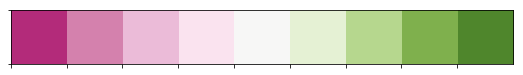

In [8]:
pal_hls = sns.color_palette("PiYG", n_colors=9, desat=0.8).as_hex() 
print(pal_hls)
sns.palplot(pal_hls)

In [9]:
# set default formatting
sns.set(context='notebook', 
        style='white', 
        palette='colorblind',
        font='AppleMyungjo',
       
        font_scale=1.2, 
        color_codes=True, 
        rc={
             'axes.edgecolor': 'dimgray',
             'axes.facecolor': 'white',
             'axes.grid': False,
             'axes.labelcolor': 'dimgray',
             'axes.spines.right': False,
             'axes.spines.top': False,
             'figure.facecolor': 'white',
             'lines.solid_capstyle': 'round',
             'text.color': 'dimgray',
             'xtick.color': 'dimgray',
             'ytick.color': 'dimgray',
          })

### Overall


In [63]:
df_merged['review_count'].describe()

count     6462.000000
mean       327.730115
std        537.399907
min          1.000000
25%         43.000000
50%        162.000000
75%        402.750000
max      12187.000000
Name: review_count, dtype: float64

Text(0, 0.5, 'Count')

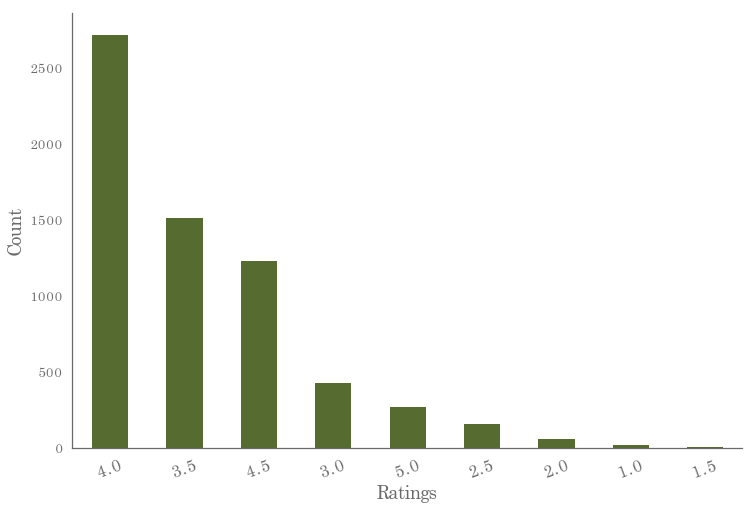

In [66]:
df_merged['rating'].value_counts(normalize=False).plot(kind='bar', 
                                                       figsize=(12,8), 
                                                       color='darkolivegreen')
plt.xlabel('Ratings', size=18)
plt.xticks(rotation=20, size=16)
plt.ylabel('Count' , size=18)

In [66]:
df_merged['rating'].value_counts(normalize=True)

4.0    0.422315
3.5    0.235067
4.5    0.191272
3.0    0.067317
5.0    0.042866
2.5    0.025070
2.0    0.010214
1.0    0.003869
1.5    0.002012
Name: rating, dtype: float64

In [68]:
(0.422315+0.235067+0.191272)*100

84.86540000000001

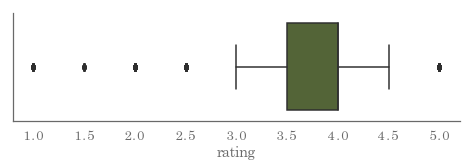

In [74]:
plt.figure(figsize=(8,2))
sns.boxplot('rating', data=df_merged, color='darkolivegreen')

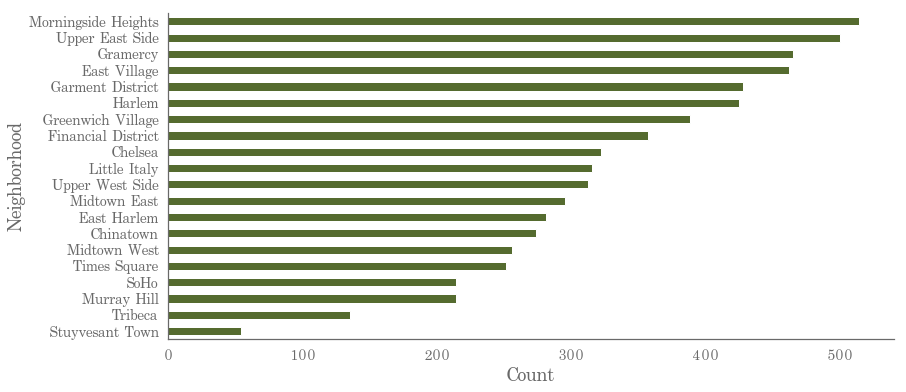

In [102]:
df_merged['neighborhood'].value_counts(normalize=False, ascending=True).plot(kind='barh', 
                                                             figsize=(13,6),
                                                             color='darkolivegreen')
plt.ylabel('Neighborhood', size=18)
plt.xlabel('Count' , size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Text(0, 0.5, 'Count')

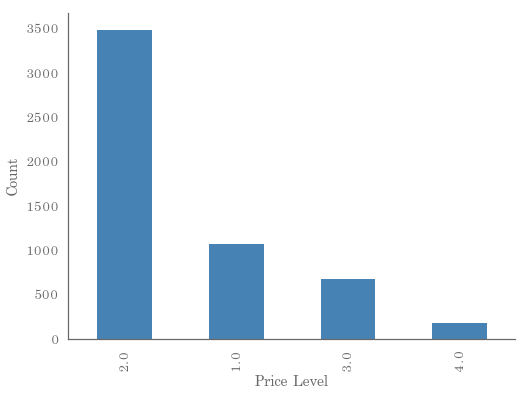

In [77]:
df_merged['price_num'].value_counts(normalize=False).plot(kind='bar', figsize=(8,6), color='steelblue')
plt.xlabel('Price Level')
plt.ylabel('Count')

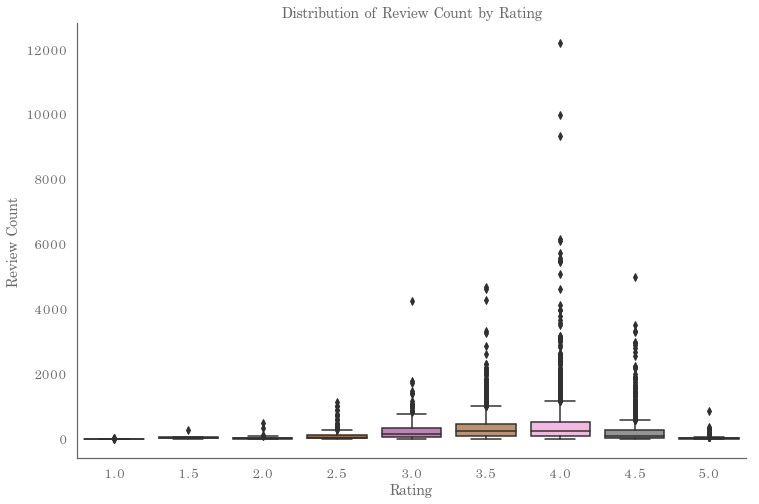

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(y="review_count", x="rating", data=df_merged)
plt.ylabel('Review Count')
plt.xlabel('Rating')
plt.title('Distribution of Review Count by Rating')
plt.show()

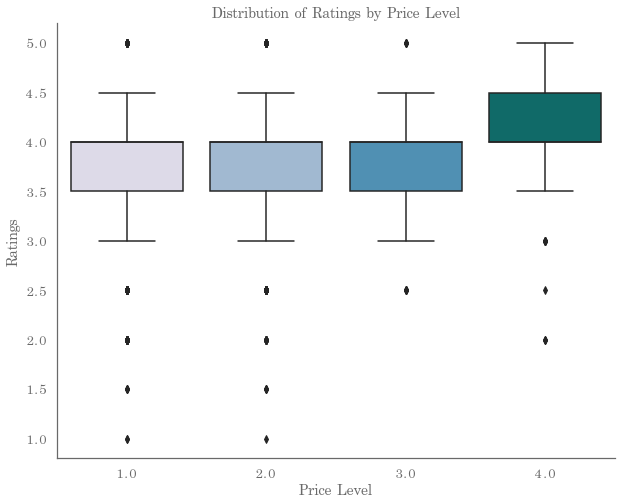

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(y="rating", x="price_num", data=df_merged, palette='PuBuGn')
plt.ylabel('Ratings')
plt.xlabel('Price Level')
plt.title('Distribution of Ratings by Price Level')
plt.show()

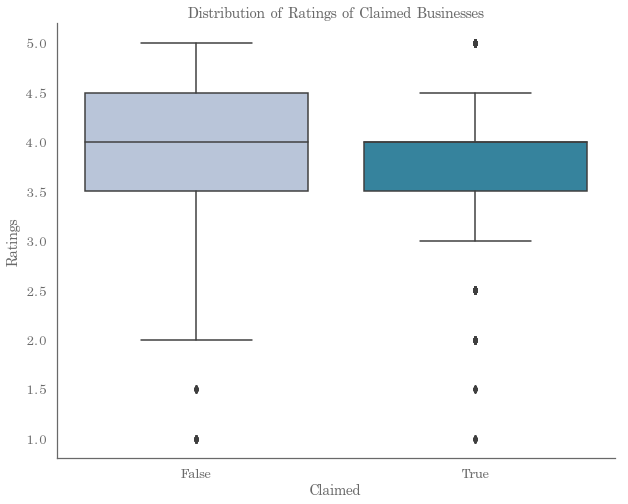

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(y="rating", x="is_claimed", data=df_merged, palette='PuBuGn')
plt.ylabel('Ratings')
plt.xlabel('Claimed')
plt.title('Distribution of Ratings of Claimed Businesses')
plt.show()

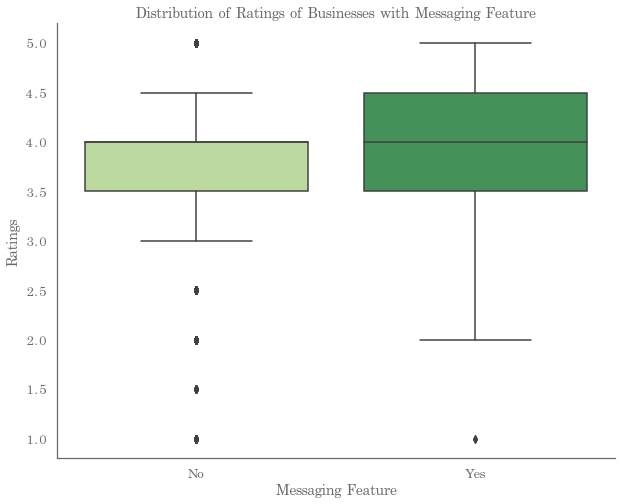

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(y="rating", x="messaging", data=df_merged, palette='YlGn')
plt.ylabel('Ratings')
plt.xlabel('Messaging Feature')
plt.xticks(ticks=[False, True], labels=['No', 'Yes'])
plt.title('Distribution of Ratings of Businesses with Messaging Feature')
plt.show()

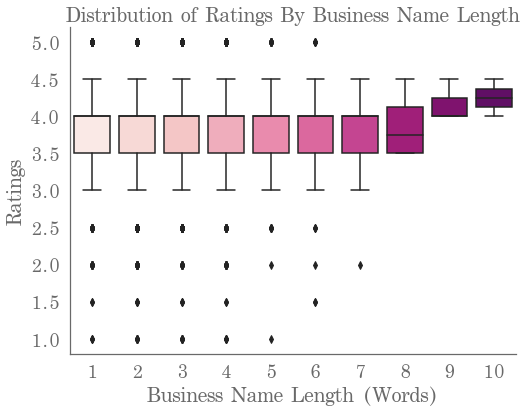

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(y="rating", x="name_len_wrd", data=df_merged, palette='RdPu')
plt.ylabel('Ratings', size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('Business Name Length (Words)', size=20)
plt.title('Distribution of Ratings By Business Name Length', size=20, weight='heavy')
plt.show()

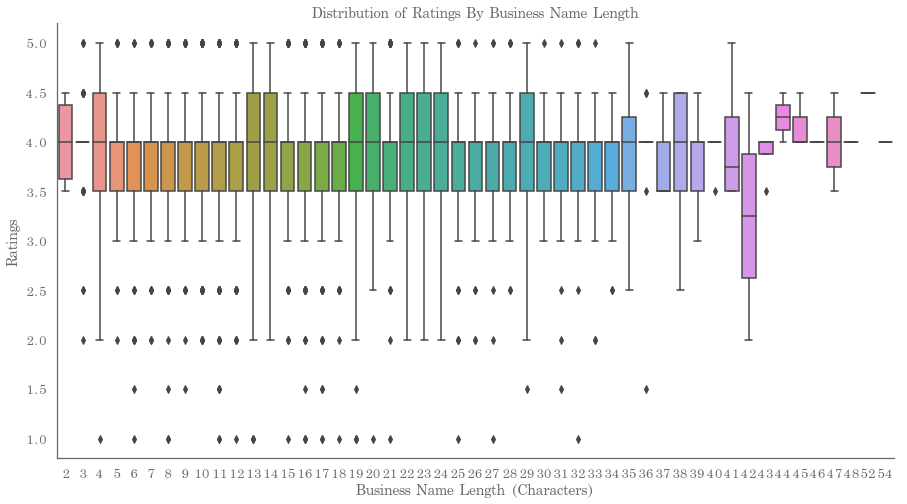

In [102]:
plt.figure(figsize=(15,8))
sns.boxplot(x="name_len_ch", y="rating",  data=df_merged)
plt.ylabel('Ratings')
plt.xlabel('Business Name Length (Characters)')
plt.title('Distribution of Ratings By Business Name Length')
plt.show()

In [237]:
df_merged.groupby('rating')['name_len_wrd'].value_counts(normalize=True
                                                        ).unstack()

name_len_wrd        1         2         3         4         5         6   \
rating                                                                     
1.0           0.120000  0.320000  0.320000  0.200000  0.040000       NaN   
1.5           0.153846  0.307692  0.230769  0.153846       NaN  0.153846   
2.0           0.212121  0.318182  0.196970  0.227273  0.015152  0.015152   
2.5           0.135802  0.370370  0.308642  0.123457  0.043210  0.018519   
3.0           0.121839  0.402299  0.271264  0.140230  0.055172  0.006897   
3.5           0.172482  0.370639  0.284398  0.099408  0.047400  0.017117   
4.0           0.197508  0.387688  0.246610  0.097105  0.047270  0.016123   
4.5           0.179612  0.394013  0.258900  0.103560  0.041262  0.015372   
5.0           0.137184  0.346570  0.317690  0.126354  0.054152  0.018051   

name_len_wrd        7         8         9         10  
rating                                                
1.0                NaN       NaN       NaN       NaN  
1.5                NaN       NaN       NaN       NaN  
2.0           0.015152       NaN       NaN       NaN  
2.5                NaN       NaN       NaN       NaN  
3.0           0.002299       NaN       NaN       NaN  
3.5           0.005925  0.002633       NaN       NaN  
4.0           0.005863  0.000733  0.000733  0.000366  
4.5           0.004045  0.001618  0.000809  0.000809  
5.0                NaN       NaN       NaN       NaN

In [238]:
df_merged.groupby('name_len_wrd')['rating'].value_counts(normalize=True
                                                        ).unstack()

rating             1.0       1.5       2.0       2.5       3.0       3.5  \
name_len_wrd                                                               
1             0.002597  0.001732  0.012121  0.019048  0.045887  0.226840   
2             0.003236  0.001618  0.008495  0.024272  0.070793  0.227751   
3             0.004692  0.001760  0.007625  0.029326  0.069208  0.253372   
4             0.007331  0.002933  0.021994  0.029326  0.089443  0.221408   
5             0.003333       NaN  0.003333  0.023333  0.080000  0.240000   
6                  NaN  0.019417  0.009709  0.029126  0.029126  0.252427   
7                  NaN       NaN  0.031250       NaN  0.031250  0.281250   
8                  NaN       NaN       NaN       NaN       NaN  0.500000   
9                  NaN       NaN       NaN       NaN       NaN       NaN   
10                 NaN       NaN       NaN       NaN       NaN       NaN   

rating             4.0       4.5       5.0  
name_len_wrd                                
1             0.466667  0.192208  0.032900  
2             0.427994  0.197006  0.038835  
3             0.394721  0.187683  0.051613  
4             0.388563  0.187683  0.051320  
5             0.430000  0.170000  0.050000  
6             0.427184  0.184466  0.048544  
7             0.500000  0.156250       NaN  
8             0.250000  0.250000       NaN  
9             0.666667  0.333333       NaN  
10            0.500000  0.500000       NaN

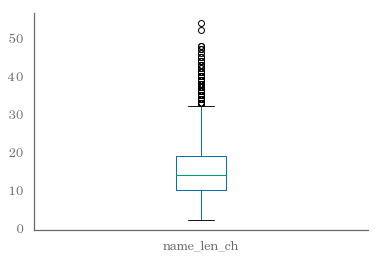

In [110]:
df_merged['name_len_ch'].plot(kind='box')

### Business Hours

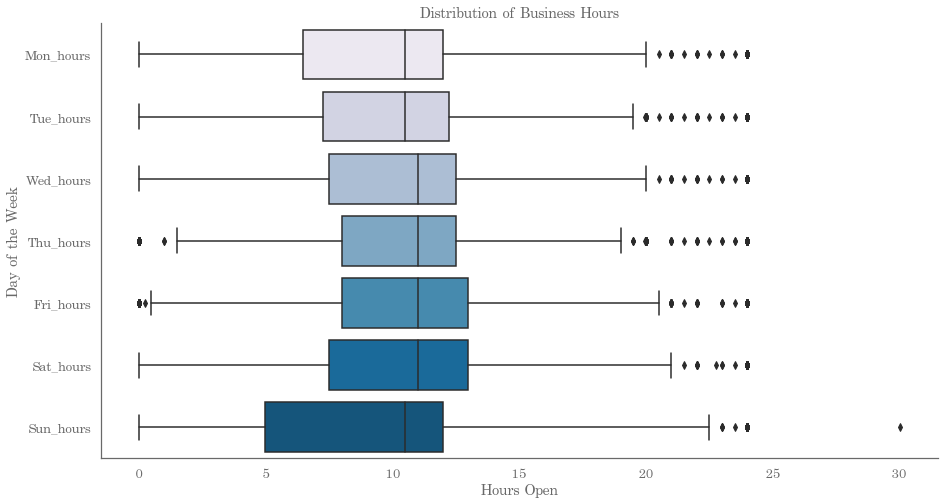

In [112]:
hours = pd.melt(df_merged[['Mon_hours', 'Tue_hours', 'Wed_hours', 'Thu_hours',
                           'Fri_hours', 'Sat_hours', 'Sun_hours']])
hours['value'] = hours['value'].astype(float)
plt.figure(figsize=(15,8))
sns.boxplot(x='value', y='variable', data=hours, palette='PuBu')
plt.title('Distribution of Business Hours')
plt.xlabel('Hours Open')
plt.ylabel('Day of the Week')
plt.show()

In [58]:
hours = pd.melt(df_merged[['Mon_hours', 'Tue_hours', 'Wed_hours', 'Thu_hours',
                           'Fri_hours', 'Sat_hours', 'Sun_hours','rating']], id_vars=['rating'])
hours.head()

rating   variable value
0     1.0  Mon_hours     0
1     3.0  Mon_hours     0
2     4.0  Mon_hours     8
3     3.5  Mon_hours  11.5
4     3.5  Mon_hours    11

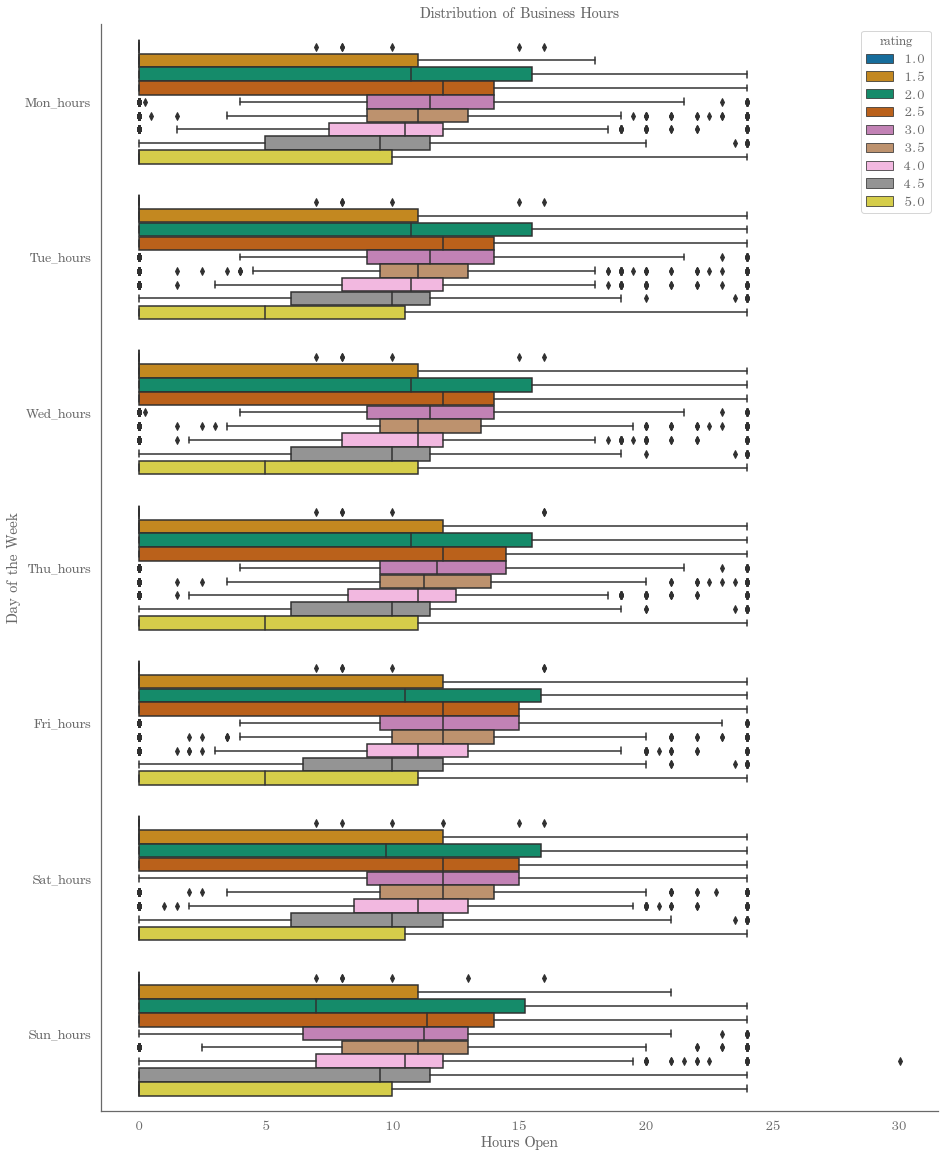

In [113]:
hours = pd.melt(df_merged[['Mon_hours', 'Tue_hours', 'Wed_hours', 'Thu_hours',
                           'Fri_hours', 'Sat_hours', 'Sun_hours','rating']], id_vars=['rating'])

hours['value'] = hours['value'].astype(float)
plt.figure(figsize=(15,20))
sns.boxplot(x='value', y='variable', hue='rating', data=hours)
plt.title('Distribution of Business Hours')
plt.xlabel('Hours Open')
plt.ylabel('Day of the Week')
plt.show()

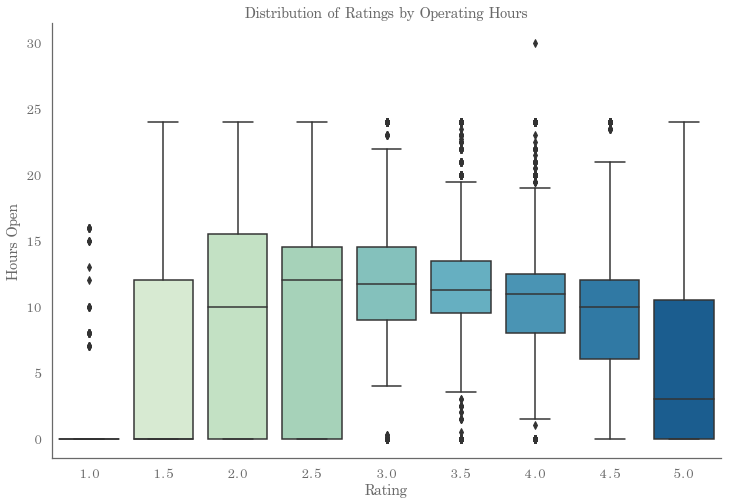

In [115]:
plt.figure(figsize=(12,8))
sns.boxplot(x='rating', y='value', data=hours, palette='GnBu')
plt.title('Distribution of Ratings by Operating Hours')
plt.xlabel('Rating')
plt.ylabel('Hours Open')
plt.show()

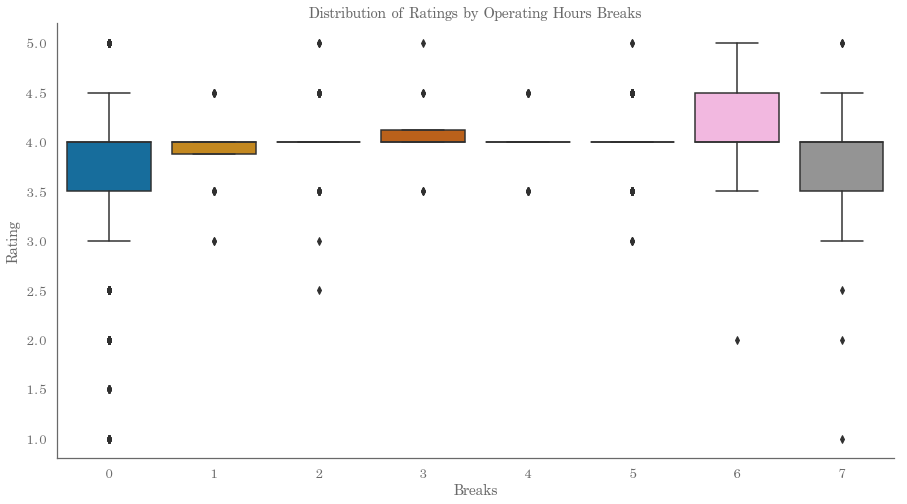

In [116]:
plt.figure(figsize=(15,8))
sns.boxplot(x='breaks', y='rating', data=df_merged, order =[0,1,2,3,4,5,6,7])
plt.title('Distribution of Ratings by Operating Hours Breaks')
plt.ylabel('Rating')
plt.xlabel('Breaks')
plt.show()

In [123]:
df_merged['breaks'].value_counts()

0    5803
7     213
5     187
2     100
6      73
1      36
4      34
3      16
Name: breaks, dtype: int64

### By neighborhoods

In [112]:
df_merged.price_num.unique()

array([nan,  2.,  1.,  3.,  4.])

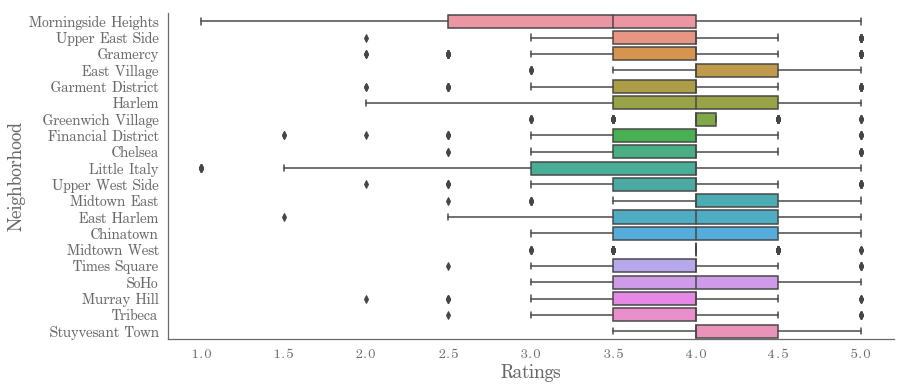

In [101]:
plt.figure(figsize=(13,6))
sns.boxplot(x="rating", 
            y="neighborhood", 
            data=df_merged,
            order=list(df_merged['neighborhood'].value_counts().index))
plt.xlabel('Ratings',size=18)
plt.ylabel('Neighborhood', size=18)
plt.yticks(size=14)
# plt.title('Distribution of Ratings by Neighborhood')
plt.show()

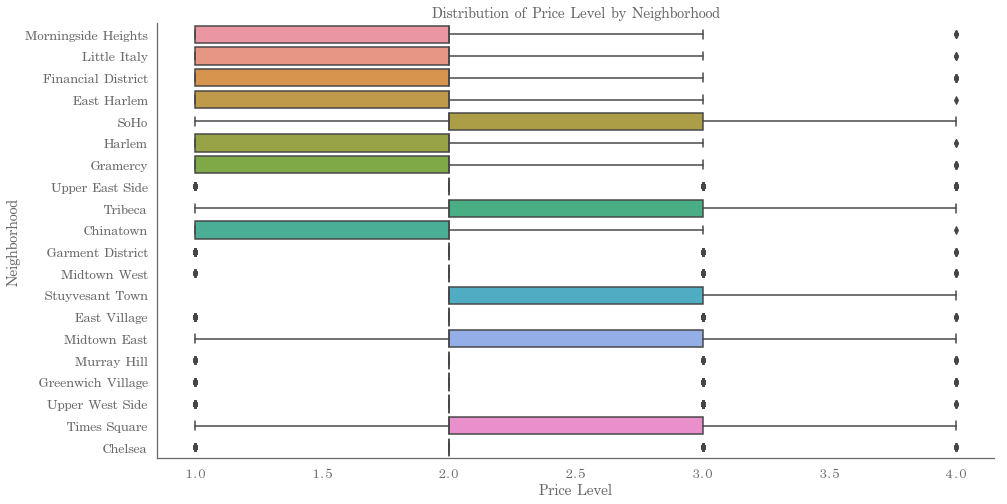

In [118]:
plt.figure(figsize=(15,8))
sns.boxplot(x="price_num", y="neighborhood", data=df_merged)
plt.xlabel('Price Level')
plt.ylabel('Neighborhood')
plt.title('Distribution of Price Level by Neighborhood')
plt.show()

In [10]:
# Histogram of ratings by price level & neighborhood
# plotly object
price = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=4.0,
    step=1.0,
    description='Price Level:',
    continuous_update=True
)

use_price = widgets.Checkbox(
    description='All Prices: ',
    value=True,
)

container = widgets.HBox(children=[use_price, price])

neighborhood = widgets.Dropdown(
    options=list(df_merged['neighborhood'].unique()),
    value='Chelsea',
    description='Neighborhoods:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df_merged['rating'], opacity=0.75, name='Ratings', marker_color='#EB89B5')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Manhattan Restaurants Ratings'
                        ),
                        barmode='overlay'
                    ))

def validate():
    if neighborhood.value in df_merged['neighborhood'].unique():
        return True
    else:
        return False

def response(change):
    if validate():
        if use_price.value:
            filter_list = [i for i in
                               zip(df_merged['neighborhood'] == neighborhood.value)]
            temp_df = df_dedup_cln[filter_list]
    
        else:
            filter_list = [i and j for i, j in
                           zip(df_merged['price_num'] == price.value, 
                               df_merged['neighborhood'] == neighborhood.value)]
            
            temp_df = df_merged[filter_list]
        x1 = temp_df['rating']
        with g.batch_update():
            g.data[0].x = x1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Ratings'
            g.layout.yaxis.title = 'Number of Restaurants'


neighborhood.observe(response, names="value")
price.observe(response, names="value")
use_price.observe(response, names="value")

container2 = widgets.HBox([neighborhood])
widgets.VBox([container,
              container2,
              g])

In [14]:
# Save figure as html
# g.write_html("RatingByNeighborhood.html")

In [15]:
# Histogram of ratings by price level & neighborhood
# plotly object
price = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=4.0,
    step=1.0,
    description='Price Level:',
    continuous_update=True
)

use_price = widgets.Checkbox(
    description='All Prices: ',
    value=True,
)

container = widgets.HBox(children=[use_price, price])

neighborhood = widgets.Dropdown(
    options=list(df_merged['neighborhood'].unique()),
    value='Chelsea',
    description='Neighborhoods:',
)


# Assign an empty figure widget with one trace
trace1 = go.Pie(labels= list(df_merged['rating'].value_counts().index), 
                values=df_merged['rating'].value_counts(), name='Ratings')
g2 = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Manhattan Restaurants Ratings'
                        )
                    ))

def validate():
    if neighborhood.value in df_merged['neighborhood'].unique():
        return True
    else:
        return False

def response(change):
    if validate():
        if use_price.value:
            filter_list = [i for i in
                               zip(df_merged['neighborhood'] == neighborhood.value)]
            temp_df = df_merged[filter_list]
    
        else:
            filter_list = [i and j for i, j in
                           zip(df_merged['price_num'] == price.value, 
                               df_merged['neighborhood'] == neighborhood.value)]
            
            temp_df = df_merged[filter_list]
        x1 = temp_df['rating'].value_counts()
        with g2.batch_update():
            g2.data[0].values = x1
            g2.data[0].labels = list(x1.index)        

neighborhood.observe(response, names="value")
price.observe(response, names="value")
use_price.observe(response, names="value")

container2 = widgets.HBox([neighborhood])
widgets.VBox([container,
              container2,
              g2])

In [16]:
# Save figure as html
# g2.write_html("RatingByNeighborhood_pie.html")

In [17]:
# Pie charts of ratings by price level & neighborhood
# plotly object
colors = pal_hls

neighborhood = widgets.Dropdown(
    options=list(df_merged['neighborhood'].unique()),
    value='Chelsea',
    description='Neighborhoods:',
    style={'description_width': 'initial'}
)

container = widgets.HBox([neighborhood])

# Assign an empty figure widget with one trace
row = 2
col = 4
specs = [[{'type':'domain'} for col in range(col)],
         [{'type':'table', 'colspan': 4}, None, None, None]]

table = df_merged[[x for x in zip(df_merged['neighborhood'] == neighborhood.value)]]\
                     .groupby(by='rating')['price_num'].value_counts(normalize=False
                                                                   ).unstack().reset_index()
table.loc['Total'] = table.sum()
table.loc['Total', 'rating'] = 'Total' 

fig = make_subplots(rows=row, cols=col, 
                    specs=specs, 
                    vertical_spacing=0.001,
                    subplot_titles=("Cheap", "Affordable", "Pricey", "Maxed Out",""))

for i in range(col):
    price = i + 1
    filter_list = [x and y for x, y in zip(df_merged['price_num'] == price,
                                           df_merged['neighborhood'] == neighborhood.value)]
            
    temp_df = df_merged[filter_list]
    
    fig.add_trace(go.Pie(labels=list(temp_df['rating'].value_counts().sort_index(ascending=False).index), 
                         values=temp_df['rating'].value_counts().sort_index(ascending=False), 
                         sort=False, marker_colors=colors, name="{}".format('$'*(price))),
                  1, price)
    
fig.add_trace(go.Table(
        header=dict(
            values=["Rating", "Price Level:<br>Cheap", "Price Level:<br>Affordable",
                    "Price Level:<br>Pricey", "Price Level:<br>Maxed Out"],
            font=dict(size=11),
            align="center"
        ),
        cells=dict(
            values=[table[k].tolist() for k in table.columns[0:]],
            align = "center")
    ), row=2, col=1)

fig.update_layout(
    height=850,
    legend_title='<b> Ratings </b>',
    legend=dict(bordercolor="Black", borderwidth=0.8),
    legend_orientation="v")

g2 = go.FigureWidget(fig,
                    layout=go.Layout(
                        title=dict(text='Manhattan Restaurants Ratings'),
                        legend_traceorder='normal'
                    ))

def validate():
    if neighborhood.value in df_merged['neighborhood'].unique():
        return True
    else:
        return False

def response(change):
    if validate():

        temp_df1 = df_merged[[i and j for i, j in zip(df_merged['neighborhood'] == neighborhood.value,
                                               df_merged['price_num'] == 1)]]
        temp_df2 = df_merged[[i and j for i, j in zip(df_merged['neighborhood'] == neighborhood.value,
                                               df_merged['price_num'] == 2)]]
        temp_df3 = df_merged[[i and j for i, j in zip(df_merged['neighborhood'] == neighborhood.value,
                                               df_merged['price_num'] == 3)]]
        temp_df4 = df_merged[[i and j for i, j in zip(df_merged['neighborhood'] == neighborhood.value,
                                               df_merged['price_num'] == 4)]]
        
        x1 = temp_df1['rating'].value_counts().sort_index(ascending=False)
        x2 = temp_df2['rating'].value_counts().sort_index(ascending=False)
        x3 = temp_df3['rating'].value_counts().sort_index(ascending=False)
        x4 = temp_df4['rating'].value_counts().sort_index(ascending=False)
        table = pd.concat([x1,x2,x3,x4], axis=1)
        table.loc['Total']= table.sum()
        table.reset_index(inplace=True)
        table.columns = ['rating', '1', '2', '3', '4']
        
        
        with g2.batch_update():
            g2.data[0].values = x1
            g2.data[0].labels = list(x1.index)
            g2.data[1].values = x2
            g2.data[1].labels = list(x2.index) 
            g2.data[2].values = x3
            g2.data[2].labels = list(x3.index) 
            g2.data[3].values = x4
            g2.data[3].labels = list(x4.index) 
            g2.data[-1].cells.values = [table[k].tolist() for k in table.columns[0:]]

neighborhood.observe(response, names="value")

widgets.VBox([container,
              g2])

In [19]:
# Save figure as html
# g2.write_html("RatingByPriceNeighborhood_pie.html")

['#7e4f17', '#b07f3c', '#d4bd85', '#f1e6c8', '#f4f5f5', '#cbe6e3', '#86c4bb', '#3f8d87', '#0b5b55']


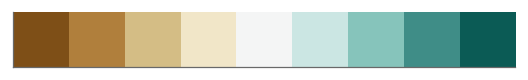

In [20]:
pal_hls = sns.color_palette("BrBG", n_colors=9, desat=0.8).as_hex() 
print(pal_hls)
sns.palplot(pal_hls)

In [21]:
# rating distribution per price level for all Manhattan
row = 2
col = 4
specs = [[{'type':'domain'} for col in range(col)],
         [{'type':'table', 'colspan': 4}, None, None, None]]
colors = pal_hls
table = df_merged.groupby(by='rating')['price_num'].value_counts(normalize=False).unstack().reset_index()

# Create subplots: use 'domain' type for Pie subplot
fig2 = make_subplots(rows=row, cols=col, 
                     vertical_spacing=0,
                     specs=specs, 
                     subplot_titles=("Cheap", "Affordable", "Pricey", "Maxed Out",""))

# rating distribution per price level
for i in range(col):
    price = i + 1
    filter_list = [x for x in zip(df_merged['price_num'] == price)]
            
    temp_df = df_merged[filter_list]
    
    fig2.add_trace(go.Pie(labels=list(temp_df['rating'].value_counts().sort_index(ascending=False).index), 
                         values=temp_df['rating'].value_counts().sort_index(ascending=False), 
                         sort=False, marker_colors=colors, name="{}".format('$'*(price))),
                  1, price)

# Use `hole` to create a donut-like pie chart
fig2.update_traces(hole=.2, hoverinfo="label+percent+name")

fig2.add_trace(
    go.Table(
        header=dict(
            values=["Rating", "Price Level:<br>Cheap", "Price Level:<br>Affordable",
                    "Price Level:<br>Pricey", "Price Level:<br>Maxed Out"],
            font=dict(family='AppleMyungjo', size=12),
            align="center"
        ),
        cells=dict(
            values=[table[k].tolist() for k in table.columns[0:]],
            align = "center",
            font=dict(family='AppleMyungjo', size=12))
    ),
    row=2, col=1)



fig2.update_layout(
    height=1000,
    font=dict(family='AppleMyungjo', size=12),
    legend_title='<b> Ratings </b>',
    legend=dict(x=0.3, y=0.55, bordercolor="Black", borderwidth=0.6, font=dict(family='AppleMyungjo', size=12)),
    legend_orientation="h",
    title_text="Distribution of Ratings By Price Level - Manhattan")
    
fig2.show()

In [175]:
# Save figure as html
# fig2.write_html("RatingByPrice.html")

In [173]:
# sanity check
# df_dedup_cln.groupby(by='price_num')['rating'].value_counts(normalize=True)

### Categories

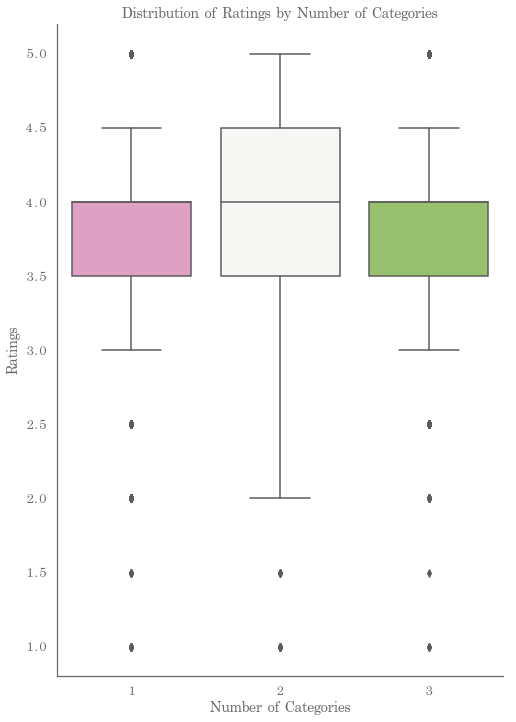

In [56]:
plt.figure(figsize=(8,12))
sns.boxplot(y="rating", x="cat_counts", data=df_merged, palette='PiYG')
plt.ylabel('Ratings')
plt.xlabel('Number of Categories')
plt.title('Distribution of Ratings by Number of Categories')
plt.show()

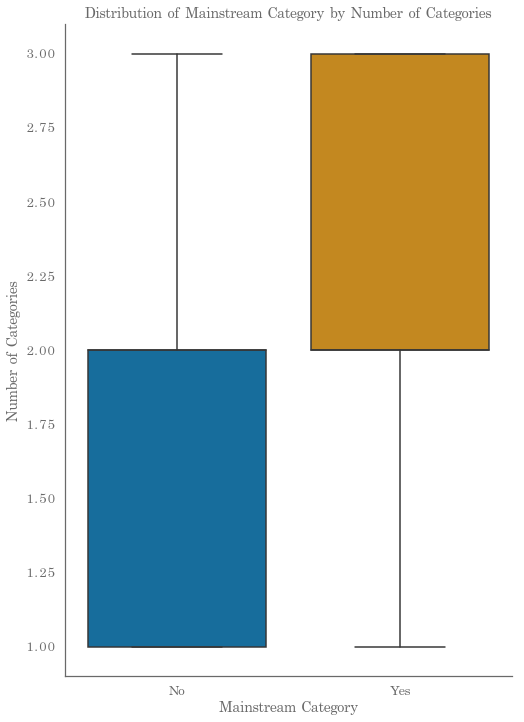

In [124]:
plt.figure(figsize=(8,12))
sns.boxplot(x="mainstream_category", y="cat_counts", data=df_merged)
plt.xlabel('Mainstream Category')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Number of Categories')
plt.title('Distribution of Mainstream Category by Number of Categories')
plt.show()

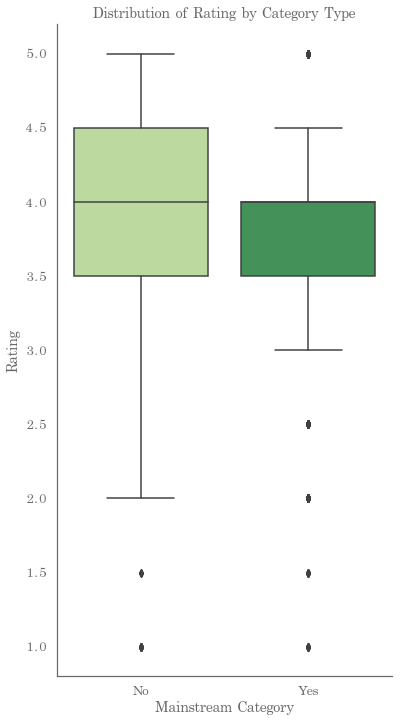

In [53]:
plt.figure(figsize=(6,12))
sns.boxplot(x="mainstream_category", y="rating", data=df_merged, palette='YlGn')
plt.xlabel('Mainstream Category')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Rating')
plt.title('Distribution of Rating by Category Type')
plt.show()

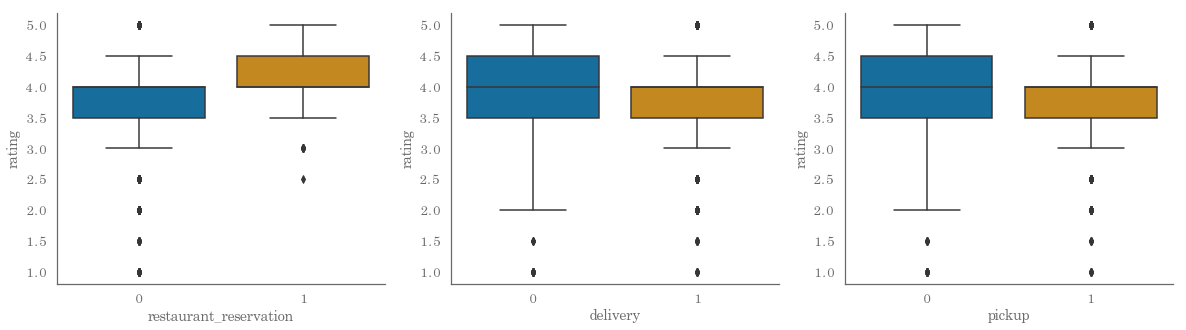

In [125]:
f, axes= plt.subplots(1,3, figsize=(20,5))
sns.boxplot(x='restaurant_reservation', y='rating', data=df_merged, ax=axes[0])
sns.boxplot(x='delivery', y='rating', data=df_merged, ax=axes[1])
sns.boxplot(x='pickup', y='rating', data=df_merged, ax=axes[2])

In [142]:
print(cat)

['italian', 'newamerican', 'breakfast_brunch', 'cocktailbars', 'tradamerican', 'bars', 'pizza', 'chinese', 'sandwiches', 'seafood', 'japanese', 'mexican', 'wine_bars', 'sushi', 'mediterranean', 'burgers', 'coffee', 'french', 'salad', 'cafes']


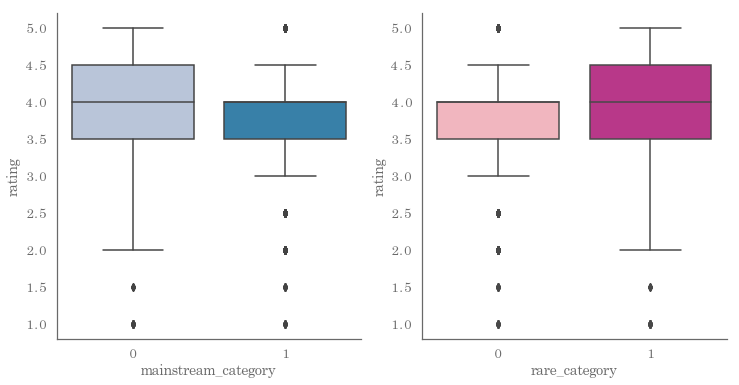

In [143]:
f, axes= plt.subplots(1,2, figsize=(12,6))
sns.boxplot(x='mainstream_category', y='rating', data=df_merged, ax=axes[0], palette='PuBu')
sns.boxplot(x='rare_category', y='rating', data=df_merged, ax=axes[1], palette='RdPu')
plt.show()

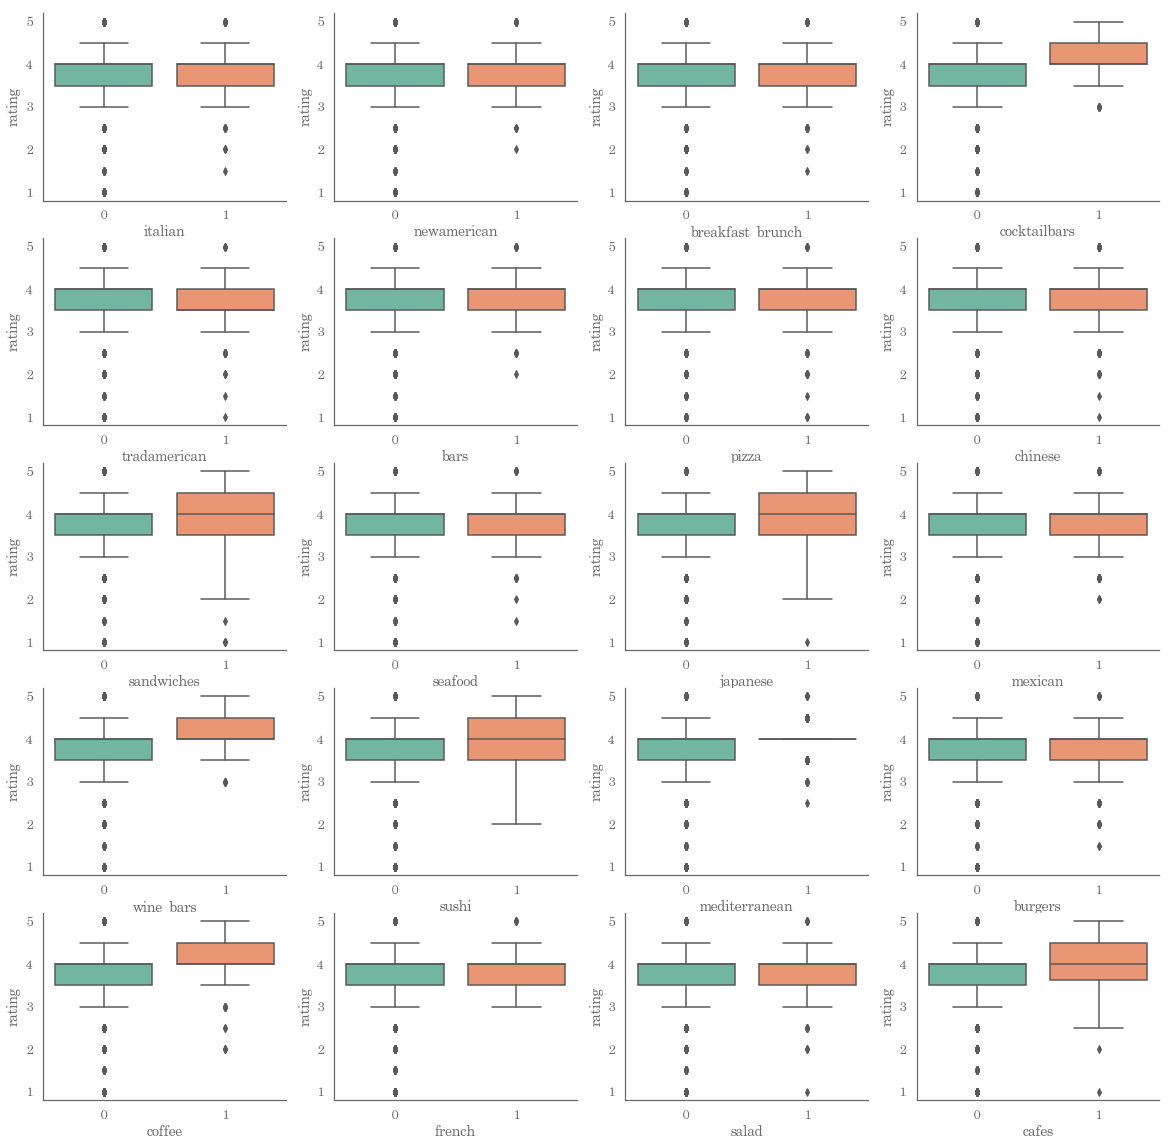

In [146]:
f, axes= plt.subplots(5,4, figsize=(20,20))
for i in range(len(cat)):
    sns.boxplot(x=cat[i], y='rating', data=df_merged, ax=axes[i//4][i%4], palette='Set2')
plt.show()


### Correlations

In [136]:
df_merged[['price_num','rating']].corr()

price_num    rating
price_num   1.000000  0.091732
rating      0.091732  1.000000

In [138]:
print('Correlation Between Price and Ratings By Neighborhood')
print('*****************************************************')
for neighborhood in neighborhoods:
    temp = df_merged[[x for x in zip(df_dedup_cln['neighborhood'] == neighborhood)]]
    corr = temp['price_num'].corr(temp['rating'])
    print('{:<20}: {:>7}'.format(neighborhood, np.round(corr, 3)))

Correlation Between Price and Ratings By Neighborhood
*****************************************************
Midtown West        :  -0.158
Greenwich Village   :   0.077
East Harlem         :  -0.019
Upper East Side     :  -0.063
Midtown East        :  -0.146
Gramercy            :    0.21
Little Italy        :   0.001
Chinatown           :  -0.051
SoHo                :  -0.047
Harlem              :   0.027
Upper West Side     :  -0.051
Tribeca             :    0.04
Garment District    :  -0.133
Stuyvesant Town     :  -0.204
Financial District  :   0.032
Chelsea             :  -0.103
Morningside Heights :   0.258
Times Square        :  -0.006
Murray Hill         :   0.009
East Village        :  -0.021
Lower East Village  :     nan


In [139]:
print('Correlation Between Category and Ratings')
print('*****************************************************')
for i in range(len(cat)):
#     temp = df_dedup_cln[[x for x in zip(df_dedup_cln[cat[i]] == 1)]]
    temp = df_merged
    corr = temp[cat[i]].corr(temp['rating'])
    print('{:<20}: {:>7}'.format(cat[i], np.round(corr, 3)))

Correlation Between Category and Ratings
*****************************************************
italian             :   0.007
newamerican         :   0.025
breakfast_brunch    :   0.016
cocktailbars        :   0.072
tradamerican        :  -0.091
bars                :  -0.008
pizza               :  -0.031
chinese             :  -0.076
sandwiches          :  -0.018
seafood             :   0.009
japanese            :   0.039
mexican             :  -0.035
wine_bars           :   0.051
sushi               :   0.041
mediterranean       :    0.04
burgers             :  -0.068
coffee              :   0.055
french              :   0.032
salad               :  -0.014
cafes               :   0.055
